In [1]:
from tensorflow import keras
import tensorflow as tf
import pickle
from tensorflow.keras.layers import Flatten, Dense, Input
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn import metrics

In [2]:
Trpath="D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 3\Group_11\\train"
TrClss=os.listdir(Trpath)
TrData=[]
TrLabel=[]
TrDataF=[]
num=0
for i in TrClss:
    path=Trpath+"\\"+i
    ClssFile=os.listdir(path)
    for j in ClssFile:
        l=np.array([0,0,0,0,0])
        filepath=path+"\\"+j
        img=plt.imread(filepath)
        #print(img)
        # img1D=img.flatten()
        #print(img1D)
        TrData.append(img)
        l[num]+=1
        TrLabel.append(l)
    num+=1
TrData=np.array(TrData)
TrLabel=np.array(TrLabel)

for i in range(len(TrData)):
  TrDataF.append(TrData[i].flatten())
TrDataF=np.array(TrDataF)

mean_vector=np.sum(TrDataF,axis=0)/TrDataF.shape[0]
TrDataFlatten=TrDataF.copy()
for i in range(TrDataF.shape[0]):
   TrDataFlatten[i,:]=TrDataF[i,:]-mean_vector

In [ ]:
mean_vector.shape

(784,)

In [3]:
Testpath="D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 3\Group_11\\test"
TestClss=os.listdir(Testpath)
TestData=[]
TestLabel=[]
TestDataF=[]
num=0
for i in TestClss:
    path=Testpath+"\\"+i
    ClssFile=os.listdir(path)
    for j in ClssFile:
        l=np.array([0,0,0,0,0])
        filepath=path+"\\"+j
        img=plt.imread(filepath)
        #print(img)
        # img1D=img.flatten()
        #print(img1D)
        TestData.append(img)
        l[num]+=1
        TestLabel.append(l)
    num+=1
TestData=np.array(TestData)
TestLabel=np.array(TestLabel)

for i in range(len(TestData)):
  TestDataF.append(TestData[i].flatten())
TestDataF=np.array(TestDataF)
TestDataFlatten=TestDataF.copy()

for i in range(TestDataF.shape[0]):
  TestDataFlatten[i,:]=TestDataF[i,:]-mean_vector

In [4]:
Valpath="D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 3\Group_11\\val"
ValClss=os.listdir(Valpath)
ValData=[]
ValLabel=[]
ValDataF=[]
num=0
for i in ValClss:
    path=Valpath+"\\"+i
    ClssFile=os.listdir(path)
    for j in ClssFile:
        l=np.array([0,0,0,0,0])
        filepath=path+"\\"+j
        img=plt.imread(filepath)
        #print(img)
        # img1D=img.flatten()
        #print(img1D)
        ValData.append(img)
        l[num]+=1
        ValLabel.append(l)
    num+=1
ValData=np.array(ValData)
ValLabel=np.array(ValLabel)

for i in range(len(ValData)):
  ValDataF.append(ValData[i].flatten())
ValDataF=np.array(ValDataF)
ValDataFlatten=ValDataF.copy()
for i in range(ValDataF.shape[0]):
  ValDataFlatten[i,:]=ValDataF[i,:]-mean_vector

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca_32=PCA(n_components=32,whiten=True)
pca_32.fit(TrDataF)
TrData_pca_32=pca_32.transform(TrDataF)


pca_64=PCA(n_components=64,whiten=True)
pca_64.fit(TrDataF)
TrData_pca_64=pca_64.transform(TrDataF)

pca_128=PCA(n_components=128,whiten=True)
pca_128.fit(TrDataF)
TrData_pca_128=pca_128.transform(TrDataF)

pca_256=PCA(n_components=256,whiten=True)
pca_256.fit(TrDataF)
TrData_pca_256=pca_256.transform(TrDataF)

In [7]:
pca_32=PCA(n_components=32,whiten=True)
pca_32.fit(TestDataF)
TestData_pca_32=pca_32.transform(TestDataF)


pca_64=PCA(n_components=64,whiten=True)
pca_64.fit(TestDataF)
TestData_pca_64=pca_64.transform(TestDataF)

pca_128=PCA(n_components=128,whiten=True)
pca_128.fit(TestDataF)
TestData_pca_128=pca_128.transform(TestDataF)

pca_256=PCA(n_components=256,whiten=True)
pca_256.fit(TestDataF)
TestData_pca_256=pca_256.transform(TestDataF)

In [8]:
pca_32=PCA(n_components=32,whiten=True)
pca_32.fit(ValDataF)
ValData_pca_32=pca_32.transform(ValDataF)


pca_64=PCA(n_components=64,whiten=True)
pca_64.fit(ValDataF)
ValData_pca_64=pca_64.transform(ValDataF)

pca_128=PCA(n_components=128,whiten=True)
pca_128.fit(ValDataF)
ValData_pca_128=pca_128.transform(ValDataF)

pca_256=PCA(n_components=256,whiten=True)
pca_256.fit(ValDataF)
ValData_pca_256=pca_256.transform(ValDataF)

In [102]:
Model32 = keras.Sequential(
    [
        Input((32,)),
        Dense(16, activation='sigmoid', name="layer1"),
        Dense(8, activation='sigmoid', name="layer2"),
        Dense(5, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [103]:
Adam1=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]
Model32.compile(optimizer=Adam1,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [104]:
history1 = Model32.fit(x=TrData_pca_32,y=TrLabel,batch_size=50,epochs=10000,validation_split=0,validation_data=(ValData_pca_32,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
228/228 [==============================] - 7s 12ms/step - loss: 1.6329 - accuracy: 0.2003 - val_loss: 1.6039 - val_accuracy: 0.2155
Epoch 2/10000
228/228 [==============================] - 1s 6ms/step - loss: 1.5881 - accuracy: 0.2870 - val_loss: 1.5701 - val_accuracy: 0.3254
Epoch 3/10000
228/228 [==============================] - 2s 7ms/step - loss: 1.5133 - accuracy: 0.3473 - val_loss: 1.4654 - val_accuracy: 0.3494
Epoch 4/10000
228/228 [==============================] - 2s 10ms/step - loss: 1.3848 - accuracy: 0.3749 - val_loss: 1.3662 - val_accuracy: 0.3889
Epoch 5/10000
228/228 [==============================] - 2s 8ms/step - loss: 1.3041 - accuracy: 0.4204 - val_loss: 1.3280 - val_accuracy: 0.4071
Epoch 6/10000
228/228 [==============================] - 2s 8ms/step - loss: 1.2657 - accuracy: 0.4273 - val_loss: 1.3027 - val_accuracy: 0.4414
Epoch 7/10000
228/228 [==============================] - 1s 6ms/step - loss: 1.2369 - accuracy: 0.4574 - val_loss: 1.2801 - val_

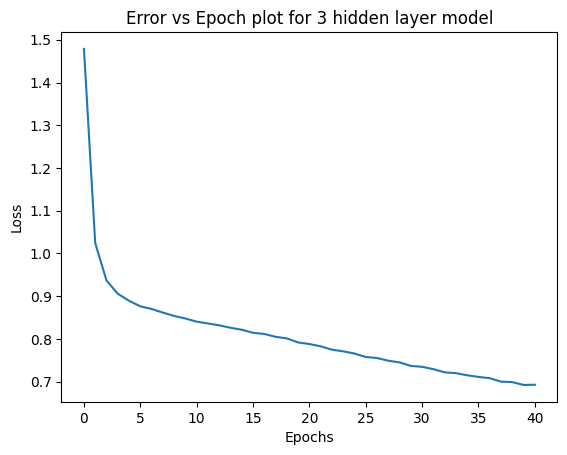

In [63]:
loss1Adam=history1.history['loss']
plt.plot(loss1Adam)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [ ]:
Model32.save('Model32.h5')

In [ ]:
Model32.evaluate(x=ValData_pca_32, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 1s 11ms/step - loss: 5.1994 - accuracy: 0.4748


[5.199394226074219, 0.4748353064060211]

In [ ]:
Model2 = keras.Sequential(
    [
        Input(shape=(64,)),
       
        Dense(512, activation='tanh', name="layer1"),
        Dense(256, activation='tanh', name="layer2" ),
        Dense(128, activation='tanh', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [ ]:
Adam1=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]
Model2.compile(optimizer=Adam1,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
history2 = Model2.fit(x=TrData_pca_64,y=TrLabel,batch_size=50,epochs=10000,validation_split=0,validation_data=(ValData_pca_64,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
228/228 [==============================] - 14s 34ms/step - loss: 0.8942 - accuracy: 0.6573 - val_loss: 1.8101 - val_accuracy: 0.4211
Epoch 2/10000
228/228 [==============================] - 6s 28ms/step - loss: 0.7335 - accuracy: 0.7181 - val_loss: 1.7194 - val_accuracy: 0.4567
Epoch 3/10000
228/228 [==============================] - 6s 28ms/step - loss: 0.6500 - accuracy: 0.7556 - val_loss: 1.8715 - val_accuracy: 0.4445
Epoch 4/10000
228/228 [==============================] - 7s 29ms/step - loss: 0.5830 - accuracy: 0.7793 - val_loss: 1.8877 - val_accuracy: 0.4480
Epoch 5/10000
228/228 [==============================] - 7s 29ms/step - loss: 0.5221 - accuracy: 0.8040 - val_loss: 1.9612 - val_accuracy: 0.4590
Epoch 6/10000
228/228 [==============================] - 7s 31ms/step - loss: 0.4579 - accuracy: 0.8281 - val_loss: 2.1362 - val_accuracy: 0.4356
Epoch 7/10000
228/228 [==============================] - 6s 29ms/step - loss: 0.3962 - accuracy: 0.8583 - val_loss: 2.2644 

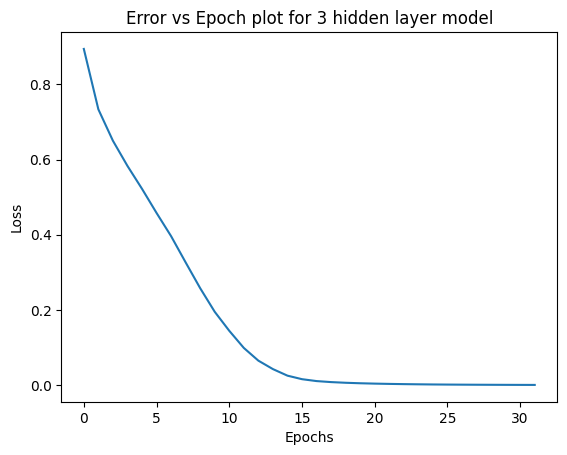

In [ ]:
loss2Adam=history2.history['loss']
plt.plot(loss2Adam)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [ ]:
Model2.save('Model64.h5')

In [ ]:
Model2.evaluate(x=ValData_pca_64, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 2s 13ms/step - loss: 5.2251 - accuracy: 0.4203


[5.225140571594238, 0.4202898442745209]

In [ ]:
Model3 = keras.Sequential(
    [
        Input(shape=(128,)),
       
        Dense(512, activation='tanh', name="layer1"),
        Dense(256, activation='tanh', name="layer2" ),
        Dense(128, activation='tanh', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [ ]:
Adam1=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]
Model3.compile(optimizer=Adam1,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
history3 = Model3.fit(x=TrData_pca_128,y=TrLabel,batch_size=50,epochs=10000,validation_split=0,validation_data=(ValData_pca_128,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
228/228 [==============================] - 13s 35ms/step - loss: 0.7338 - accuracy: 0.7296 - val_loss: 1.9003 - val_accuracy: 0.4264
Epoch 2/10000
228/228 [==============================] - 7s 31ms/step - loss: 0.5482 - accuracy: 0.8004 - val_loss: 1.9462 - val_accuracy: 0.4469
Epoch 3/10000
228/228 [==============================] - 7s 29ms/step - loss: 0.4543 - accuracy: 0.8357 - val_loss: 1.9679 - val_accuracy: 0.4506
Epoch 4/10000
228/228 [==============================] - 7s 31ms/step - loss: 0.3764 - accuracy: 0.8638 - val_loss: 2.1678 - val_accuracy: 0.4324
Epoch 5/10000
228/228 [==============================] - 6s 27ms/step - loss: 0.3020 - accuracy: 0.8959 - val_loss: 2.2410 - val_accuracy: 0.4340
Epoch 6/10000
228/228 [==============================] - 6s 26ms/step - loss: 0.2207 - accuracy: 0.9279 - val_loss: 2.5262 - val_accuracy: 0.4353
Epoch 7/10000
228/228 [==============================] - 6s 28ms/step - loss: 0.1527 - accuracy: 0.9553 - val_loss: 2.6357 

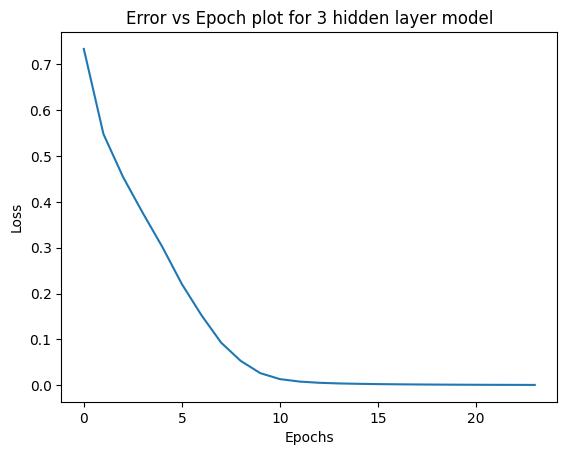

In [ ]:
loss3Adam=history3.history['loss']
plt.plot(loss3Adam)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [ ]:
Model3.save('Model128.h5')

In [ ]:
Model3.evaluate(x=ValData_pca_128, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 2s 12ms/step - loss: 4.8964 - accuracy: 0.4356


[4.896376609802246, 0.43557313084602356]

In [ ]:
Model4 = keras.Sequential(
    [
        Input(shape=(256,)),
       
        Dense(512, activation='tanh', name="layer1"),
        Dense(256, activation='tanh', name="layer2" ),
        Dense(128, activation='tanh', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [ ]:
Adam1=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]
Model4.compile(optimizer=Adam1,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
history4 = Model4.fit(x=TrData_pca_256,y=TrLabel,batch_size=50,epochs=10000,validation_split=0,validation_data=(ValData_pca_256,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
228/228 [==============================] - 14s 38ms/step - loss: 0.6010 - accuracy: 0.7830 - val_loss: 2.3932 - val_accuracy: 0.3773
Epoch 2/10000
228/228 [==============================] - 8s 35ms/step - loss: 0.3508 - accuracy: 0.8806 - val_loss: 2.4067 - val_accuracy: 0.3910
Epoch 3/10000
228/228 [==============================] - 8s 36ms/step - loss: 0.2471 - accuracy: 0.9165 - val_loss: 2.6182 - val_accuracy: 0.3858
Epoch 4/10000
228/228 [==============================] - 8s 35ms/step - loss: 0.1735 - accuracy: 0.9419 - val_loss: 2.8944 - val_accuracy: 0.3913
Epoch 5/10000
228/228 [==============================] - 8s 34ms/step - loss: 0.1060 - accuracy: 0.9675 - val_loss: 3.2037 - val_accuracy: 0.3976
Epoch 6/10000
228/228 [==============================] - 8s 34ms/step - loss: 0.0644 - accuracy: 0.9838 - val_loss: 3.5863 - val_accuracy: 0.4005
Epoch 7/10000
228/228 [==============================] - 8s 35ms/step - loss: 0.0336 - accuracy: 0.9931 - val_loss: 3.7964 

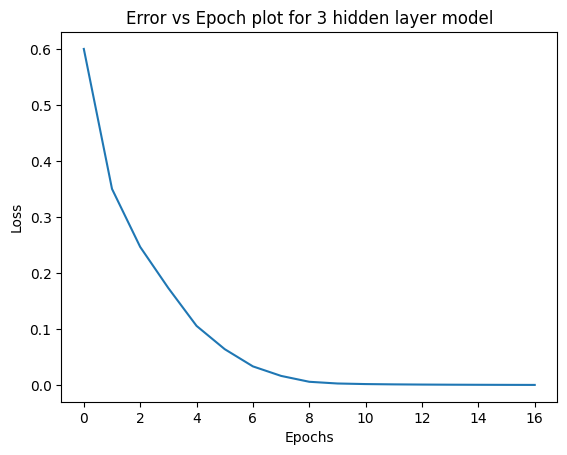

In [ ]:
loss4Adam=history4.history['loss']
plt.plot(loss4Adam)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [ ]:
Model4.save('Model256.h5')

In [ ]:
Model4.evaluate(x=ValData_pca_256, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 2s 17ms/step - loss: 5.3256 - accuracy: 0.4050


[5.325625419616699, 0.4050065875053406]

Denoising

In [10]:
NoiseTr=np.random.normal(size=np.shape(TrDataF))
NoiseTest=np.random.normal(size=np.shape(TestDataF))
NoiseVal=np.random.normal(size=np.shape(ValDataF))

In [75]:
Noise.shape

(11385, 28, 28)

In [11]:
DenoiseTr1=0.8*TrDataF+0.2*NoiseTr
DenoiseTr2=0.6*TrDataF+0.4*NoiseTr

DenoiseVal1=0.8*ValDataF+0.2*NoiseVal
DenoiseVal2=0.6*ValDataF+0.4*NoiseVal

DenoiseTest1=0.8*TestDataF+0.2*NoiseTest
DenoiseTest2=0.6*TestDataF+0.4*NoiseTest

In [77]:
Denoise.shape

(11385, 28, 28)

In [94]:
TrData=TrData.reshape((np.shape(TrData)[0],np.shape(TrData)[1],np.shape(TrData)[2],1))

In [95]:
TrData.shape

(11385, 28, 28, 1)

Model 1 : Denoising

In [121]:
#input=Input(shape=(28,28),name="InputLayer")
#l=Flatten()(input)
#h1=Dense(256,activation="sigmoid",name="HiddenLayer1")(l)
input=Input(shape=(784,),name="InputLayer")
h1=Dense(256,activation="sigmoid",name="HiddenLayer1")(input)
output=Dense(784,activation="sigmoid",name="OutputLayer")(h1)
ModelDenoise1=keras.Model(inputs=input,outputs=output,name="DenoisingAutoencoder")

In [6]:
def find_permutation(S):
        import random
        import math
        #import numpy as np
        # Code here
        n = len(S)
        comb=math.factorial(n)
        words=[]
        def combi(comb,S,words):
            ch=[]
            for j in range(len(S)):
                ch.append(S[j])
            if comb==0:
                pass
            else:
                S1=" "
                a=ch[-1]
                b=ch[-2]
                for i in ch:
                    if i==a:
                        S1+=b
                    if i==b:
                        S1+=a
                    else:
                        S1+=i
                S1=S1[1:]
                if ~(S1 in words):
                    words.append(S1)
                else:
                    S1=" "
                    a=ch[-2]
                    b=ch[-3]
                    for i in ch:
                        if i==a:
                            S1+=b
                        if i==b:
                            S1+=a
                        else:
                            S1+=i
                    S1=S1[1:]
                    if ~(S1 in words):
                        words.append(S1)
                comb-=1
                combi(comb,S1,words)
        combi(comb,S,words)
        return words


In [7]:
find_permutation("ABC")

['ACBC',
 'ABCCBC',
 'ACBCBCCBC',
 'ABCCBCCBCBCCBC',
 'ACBCBCCBCBCCBCCBCBCCBC',
 'ABCCBCCBCBCCBCCBCBCCBCBCCBCCBCBCCBC']

In [122]:
opt=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',patience=1, min_delta=0.0001)]

ModelDenoise1.compile(optimizer=opt,loss="mse",metrics=['accuracy'])

In [123]:
history_denoise1 = ModelDenoise1.fit(x=DenoiseTr1/255.0,y=TrDataF/255.0,batch_size=50,epochs=1000,validation_split=0,validation_data=(DenoiseVal1/255.0,ValDataF/255.0),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/1000
228/228 [==============================] - 15s 47ms/step - loss: 0.0578 - accuracy: 0.0014 - val_loss: 0.0393 - val_accuracy: 0.0018
Epoch 2/1000
228/228 [==============================] - 9s 41ms/step - loss: 0.0322 - accuracy: 0.0029 - val_loss: 0.0268 - val_accuracy: 0.0026
Epoch 3/1000
228/228 [==============================] - 10s 43ms/step - loss: 0.0230 - accuracy: 0.0032 - val_loss: 0.0200 - val_accuracy: 0.0032
Epoch 4/1000
228/228 [==============================] - 10s 45ms/step - loss: 0.0175 - accuracy: 0.0032 - val_loss: 0.0157 - val_accuracy: 0.0042
Epoch 5/1000
228/228 [==============================] - 9s 41ms/step - loss: 0.0140 - accuracy: 0.0037 - val_loss: 0.0128 - val_accuracy: 0.0032
Epoch 6/1000
228/228 [==============================] - 10s 45ms/step - loss: 0.0116 - accuracy: 0.0040 - val_loss: 0.0108 - val_accuracy: 0.0040
Epoch 7/1000
228/228 [==============================] - 9s 39ms/step - loss: 0.0098 - accuracy: 0.0054 - val_loss: 0.0093 - va

In [125]:
Trpred1=ModelDenoise1.predict(DenoiseTr1/255.0)
Testpred1=ModelDenoise1.predict(DenoiseTest1/255.0)
Valpred1=ModelDenoise1.predict(DenoiseVal1/255.0)

119/119 [==============================] - 1s 12ms/step


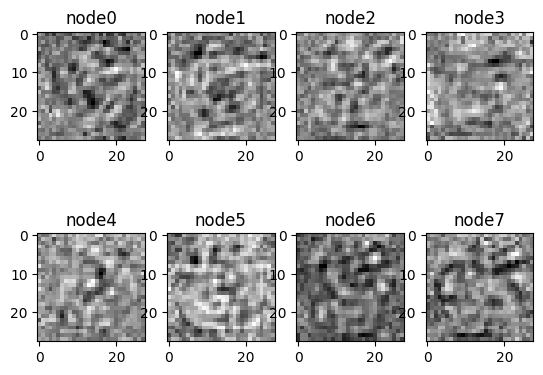

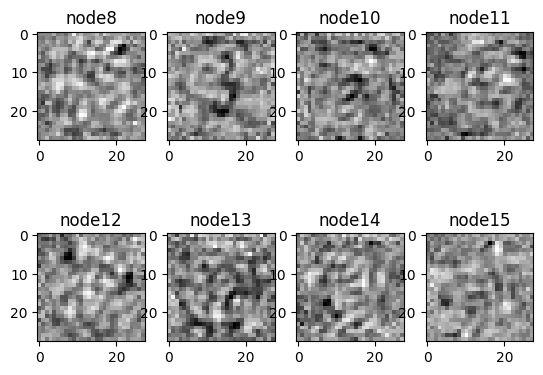

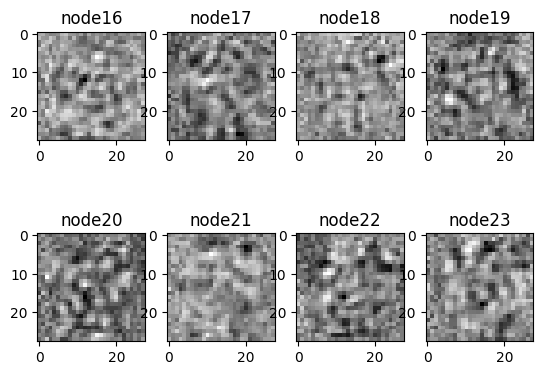

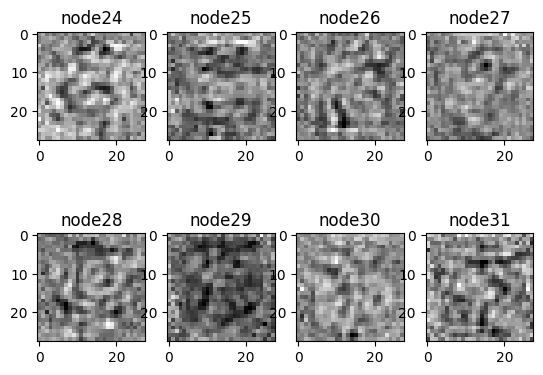

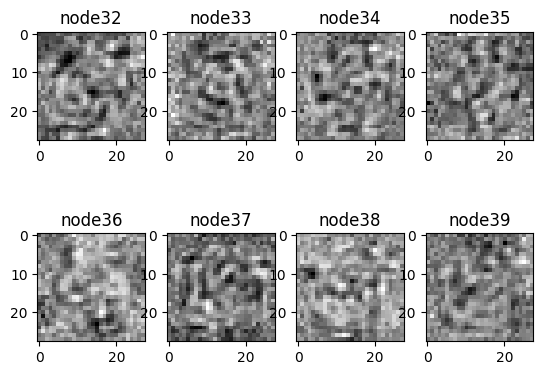

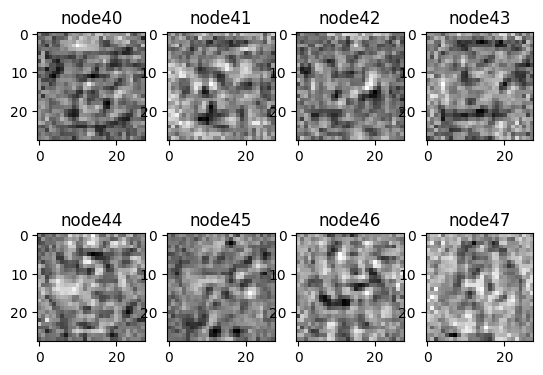

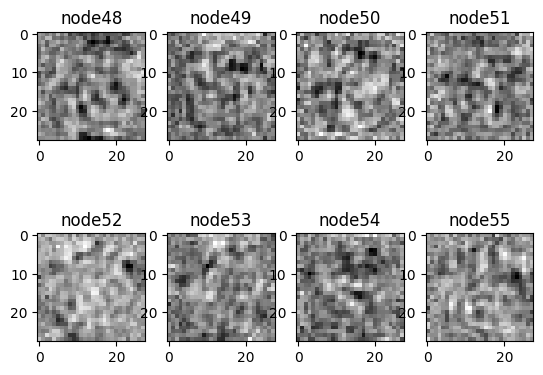

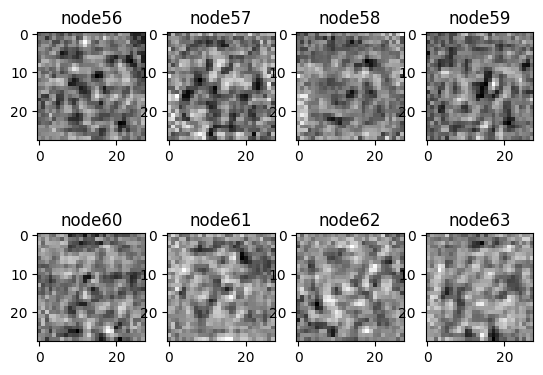

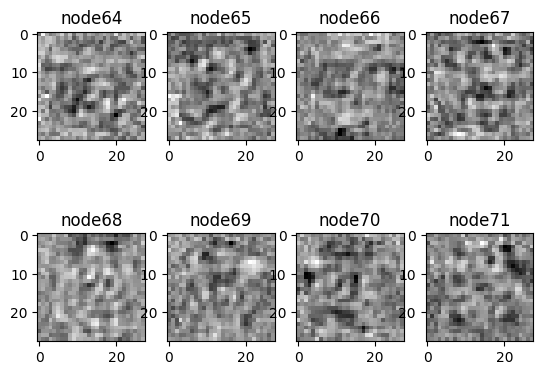

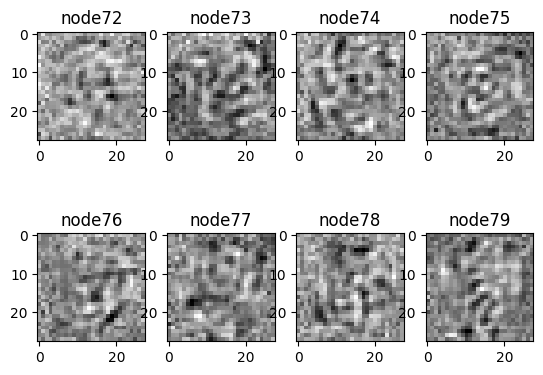

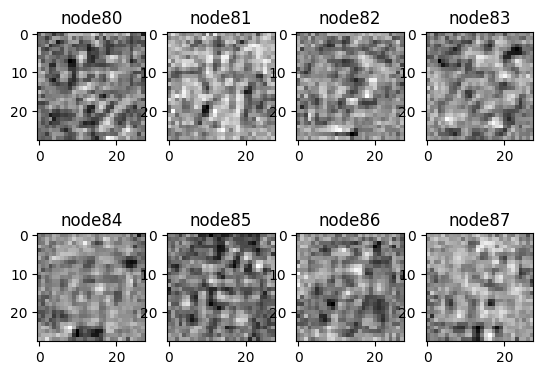

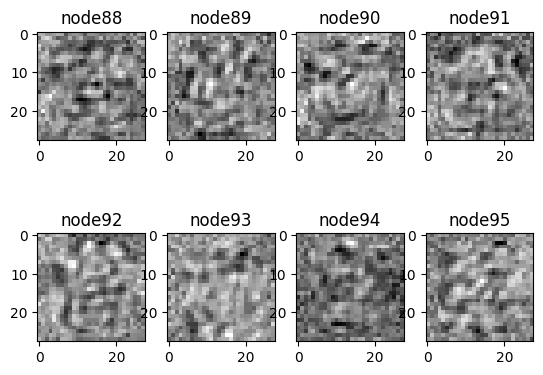

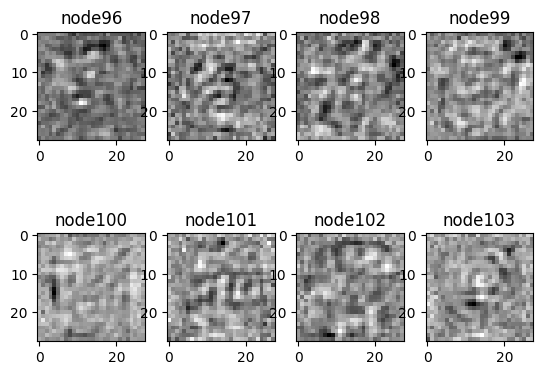

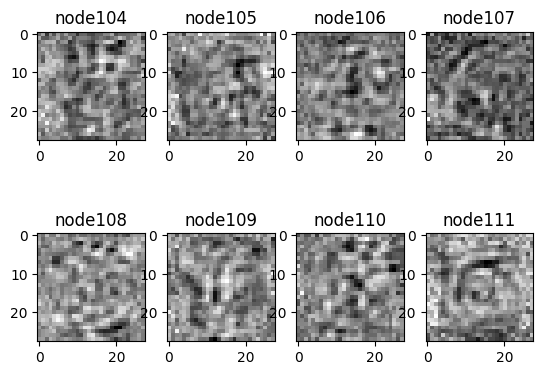

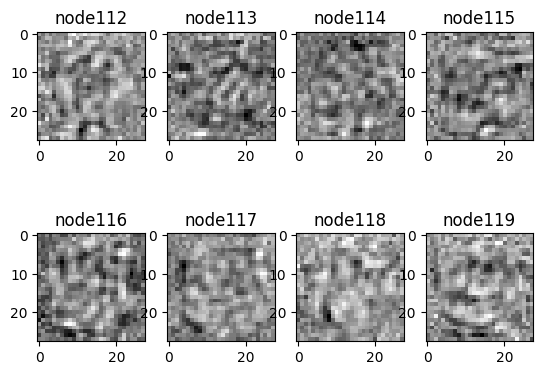

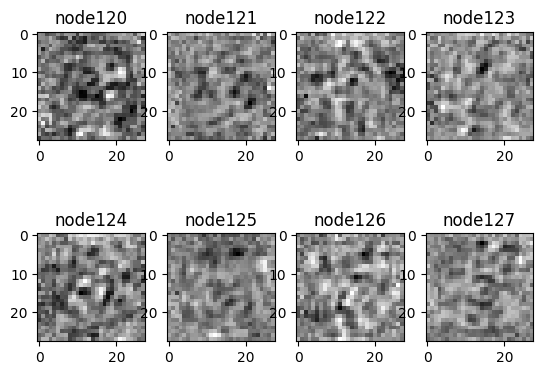

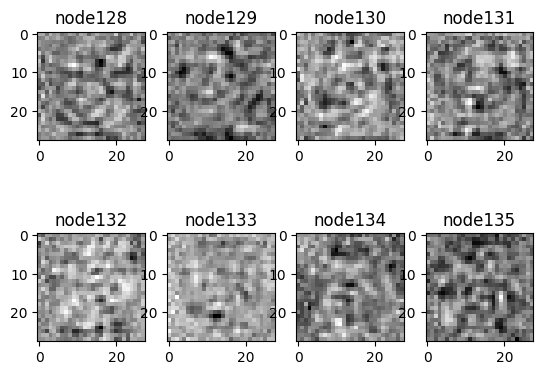

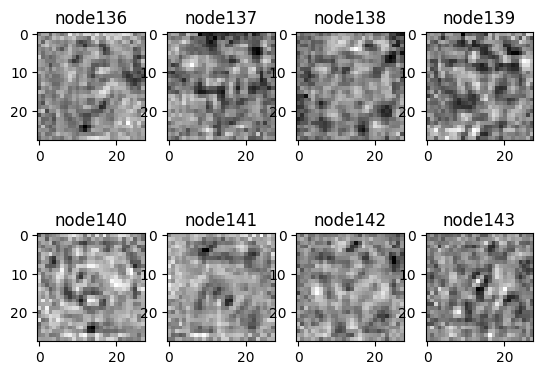

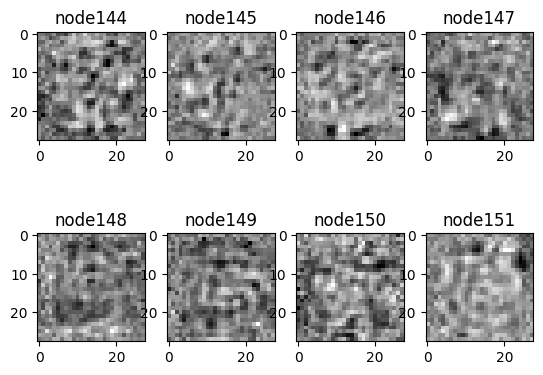

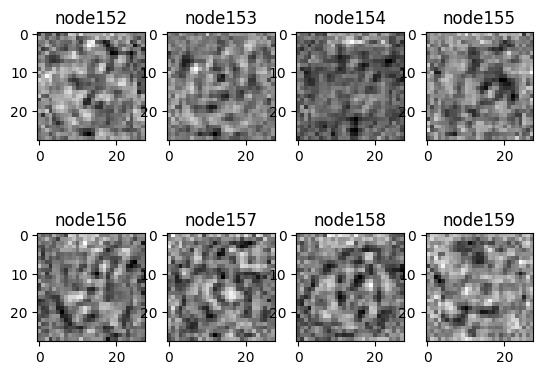

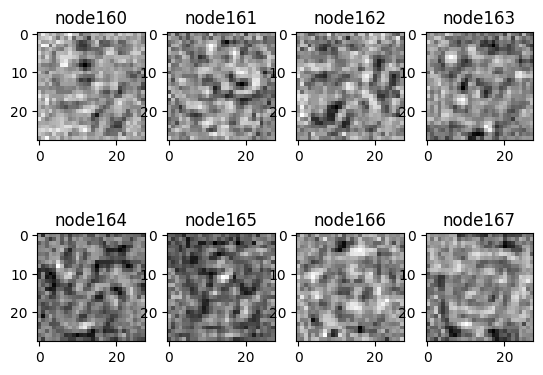

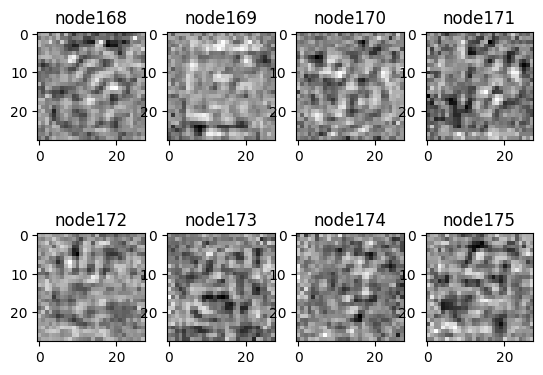

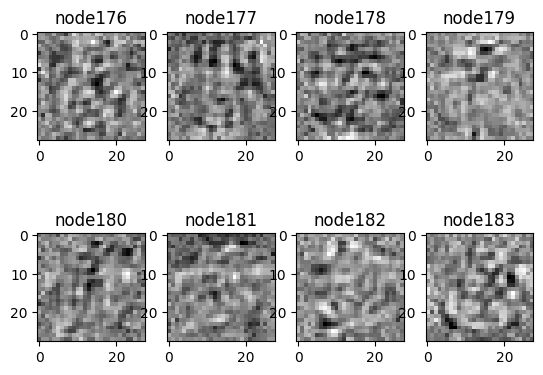

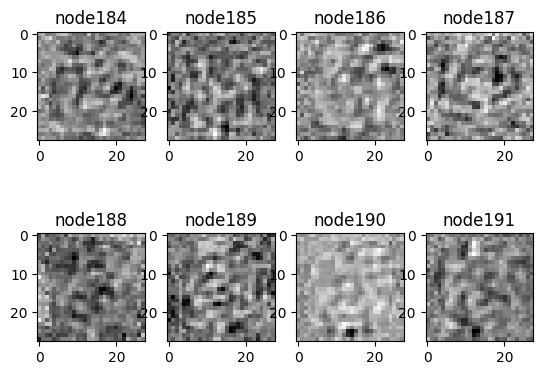

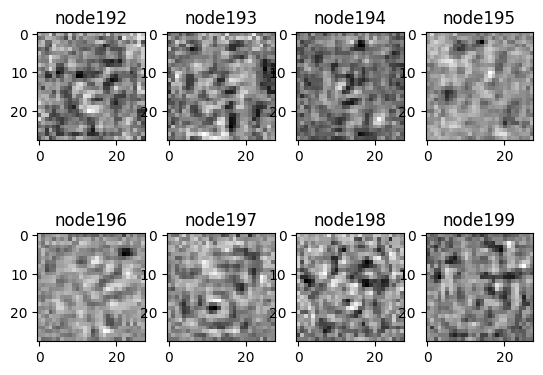

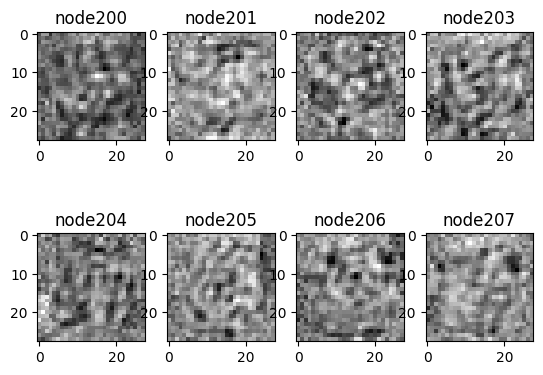

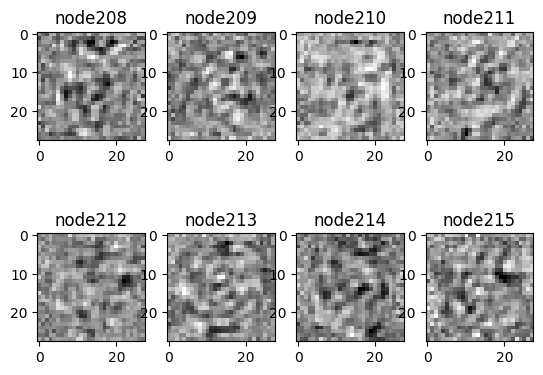

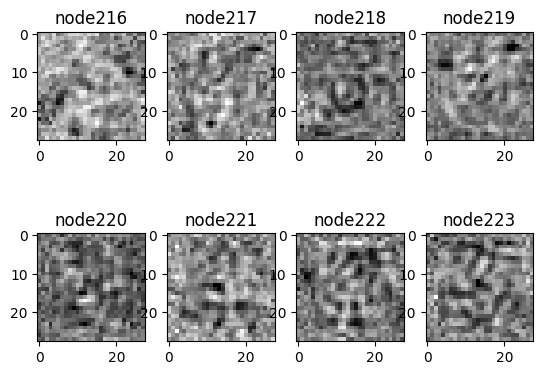

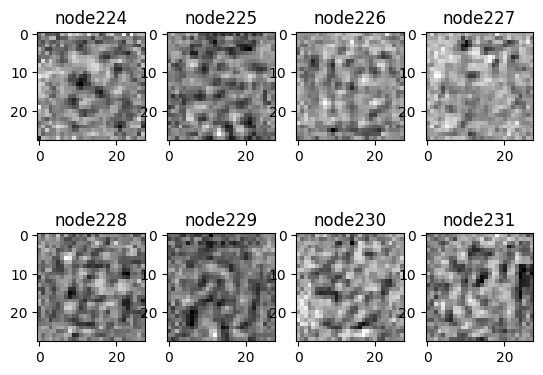

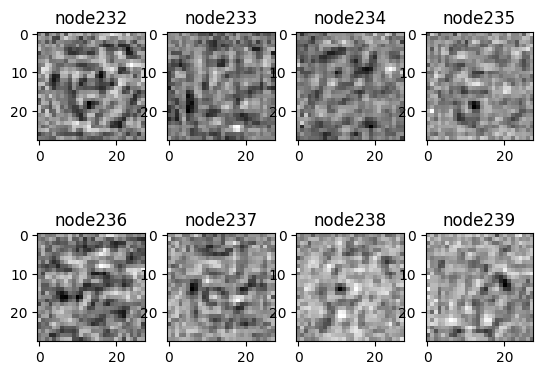

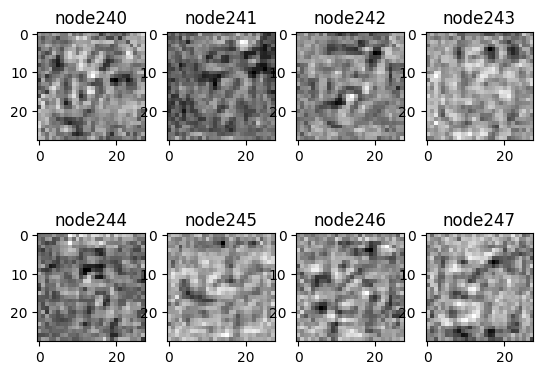

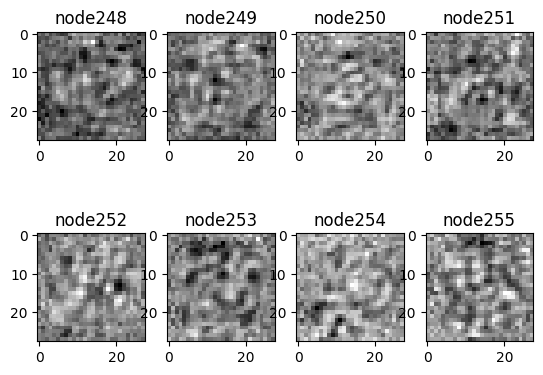

In [189]:
W1=ModelDenoise1.get_weights()[0].T
for i in range(0,W1.shape[0],8):
  plt.subplot(2,4,1)
  plt.title("node{}".format(i))
  plt.imshow(W1[i,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,2)
  plt.title("node{}".format(i+1))
  plt.imshow(W1[i+1,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,3)
  plt.title("node{}".format(i+2))
  plt.imshow(W1[i+2,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,4)
  plt.title("node{}".format(i+3))
  plt.imshow(W1[i+3,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,5)
  plt.title("node{}".format(i+4))
  plt.imshow(W1[i+4,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,6)
  plt.title("node{}".format(i+5))
  plt.imshow(W1[i+5,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,7)
  plt.title("node{}".format(i+6))
  plt.imshow(W1[i+6,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,8)
  plt.title("node{}".format(i+7))
  plt.imshow(W1[i+7,:].reshape((28,28)),cmap="gray")
  plt.show()

In [15]:
def reconstrutErr(pre,act):
    s=(act-pre)**2
    err=np.sum(s)/len(pre)
    return err

In [127]:
TrErr1=reconstrutErr(Trpred1,TrDataF)
ValErr1=reconstrutErr(Valpred1,ValDataF)
TestErr1=reconstrutErr(Testpred1,TestDataF)

In [128]:
print("Reconstruction Error for Training:",TrErr1)
print("Reconstruction Error for Validation:",ValErr1)
print("Reconstruction Error for Test:",TestErr1)

Reconstruction Error for Training: 5778447.919894598
Reconstruction Error for Validation: 5822210.900658761
Reconstruction Error for Test: 5802442.169169961


In [129]:
input2=Input(shape=(784,),name="InputLayer")
h12=Dense(256,activation="sigmoid",name="HiddenLayer1")(input2)
#h1=Dense(256,activation="sigmoid",name="HiddenLayer1")(l)
output=Dense(784,activation="sigmoid",name="OutputLayer")(h12)
ModelDenoise2=keras.Model(inputs=input2,outputs=output,name="DenoisingAutoencoder2")

In [130]:
opt=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',patience=1, min_delta=0.0001)]

ModelDenoise2.compile(optimizer=opt,loss="mse",metrics=['accuracy'])

In [131]:
history_denoise2 = ModelDenoise2.fit(x=DenoiseTr2/255.0,y=TrDataF/255.0,batch_size=50,epochs=1000,validation_split=0,validation_data=(DenoiseVal2/255.0,ValDataF/255.0),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/1000
228/228 [==============================] - 15s 48ms/step - loss: 0.0596 - accuracy: 7.9051e-04 - val_loss: 0.0408 - val_accuracy: 0.0021
Epoch 2/1000
228/228 [==============================] - 10s 42ms/step - loss: 0.0339 - accuracy: 0.0032 - val_loss: 0.0286 - val_accuracy: 0.0026
Epoch 3/1000
228/228 [==============================] - 10s 42ms/step - loss: 0.0246 - accuracy: 0.0034 - val_loss: 0.0215 - val_accuracy: 0.0026
Epoch 4/1000
228/228 [==============================] - 10s 43ms/step - loss: 0.0190 - accuracy: 0.0033 - val_loss: 0.0171 - val_accuracy: 0.0018
Epoch 5/1000
228/228 [==============================] - 9s 41ms/step - loss: 0.0153 - accuracy: 0.0026 - val_loss: 0.0140 - val_accuracy: 0.0026
Epoch 6/1000
228/228 [==============================] - 10s 42ms/step - loss: 0.0127 - accuracy: 0.0044 - val_loss: 0.0118 - val_accuracy: 0.0034
Epoch 7/1000
228/228 [==============================] - 9s 40ms/step - loss: 0.0108 - accuracy: 0.0054 - val_loss: 0.0102

In [133]:
Trpred2=ModelDenoise2.predict(DenoiseTr2/255.0)
Testpred2=ModelDenoise2.predict(DenoiseTest2/255.0)
Valpred2=ModelDenoise2.predict(DenoiseVal2/255.0)

119/119 [==============================] - 2s 12ms/step


In [180]:
W2=ModelDenoise2.get_weights()[0].T
W2.shape

(256, 784)

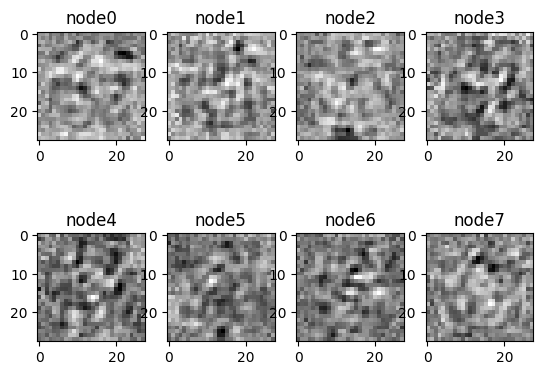

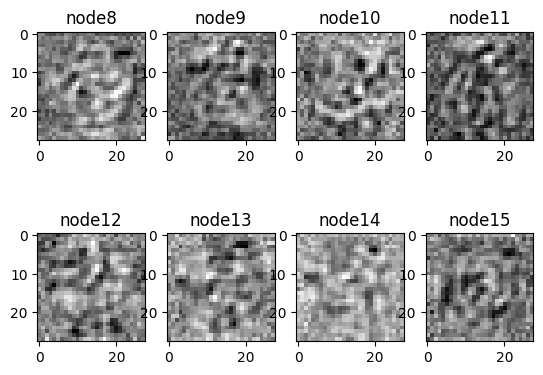

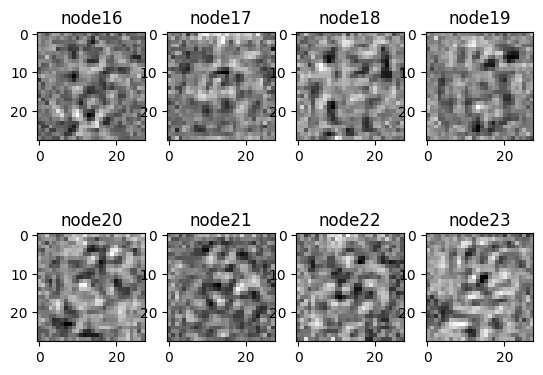

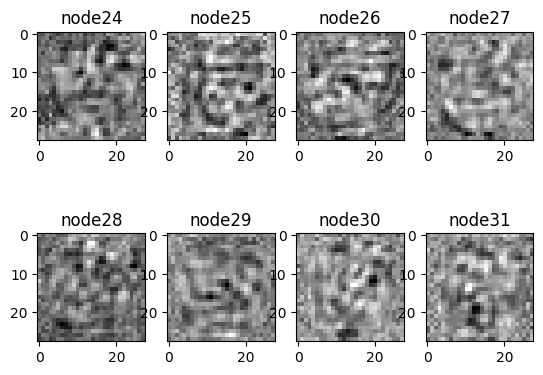

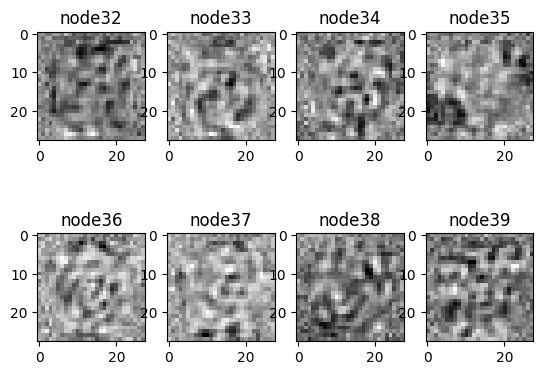

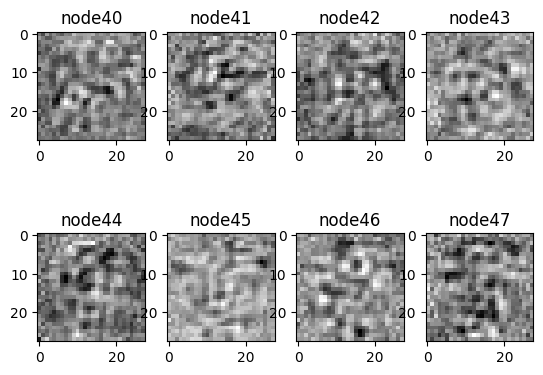

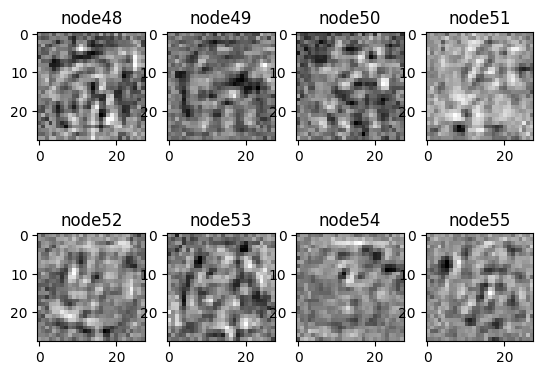

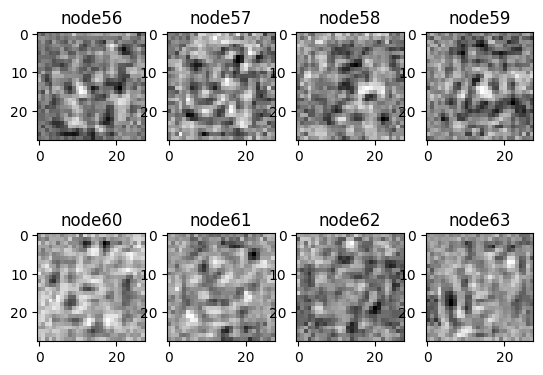

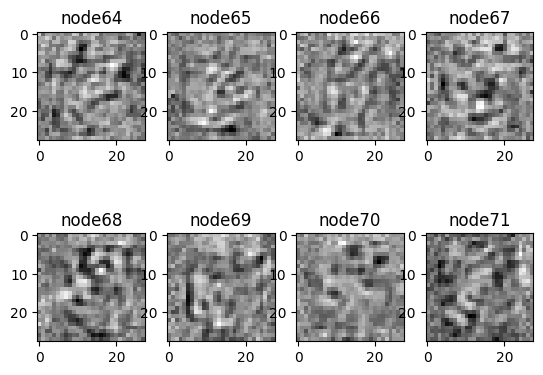

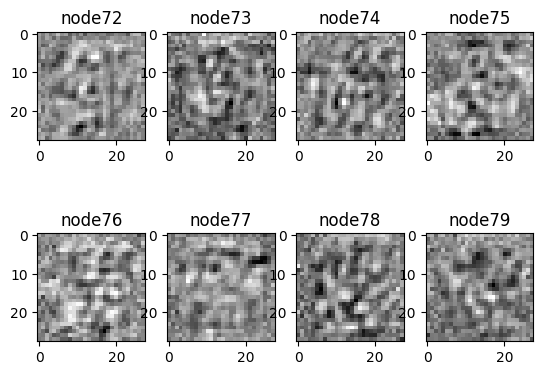

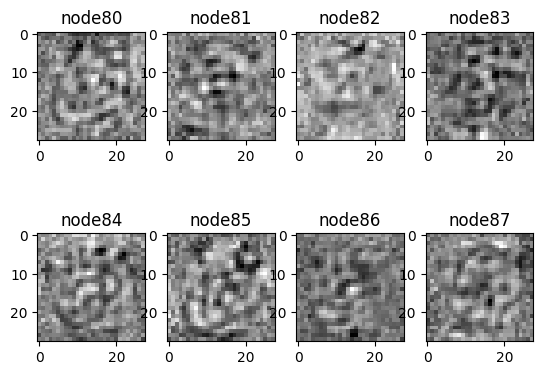

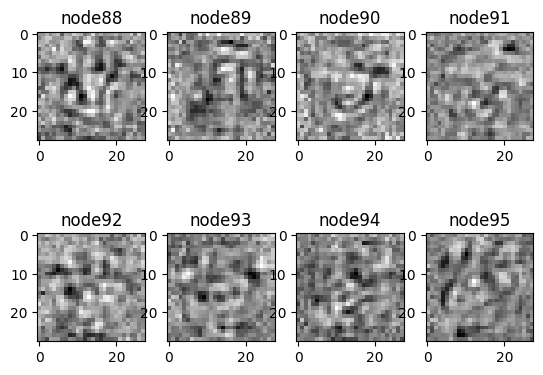

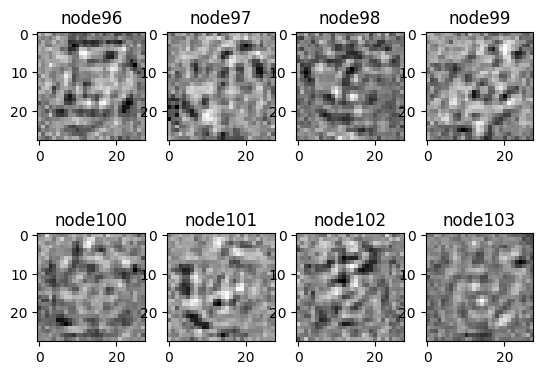

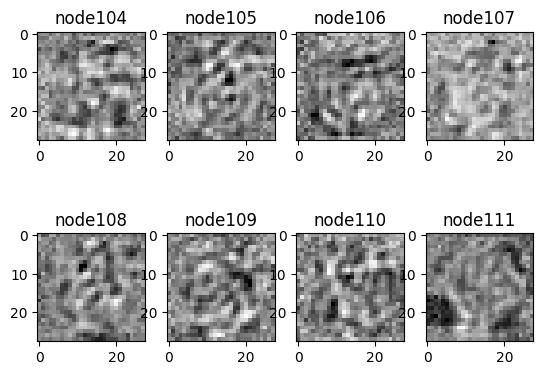

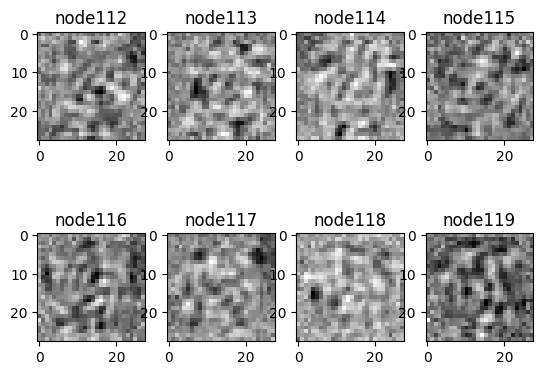

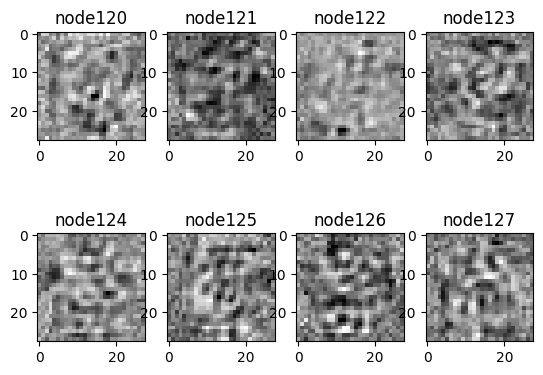

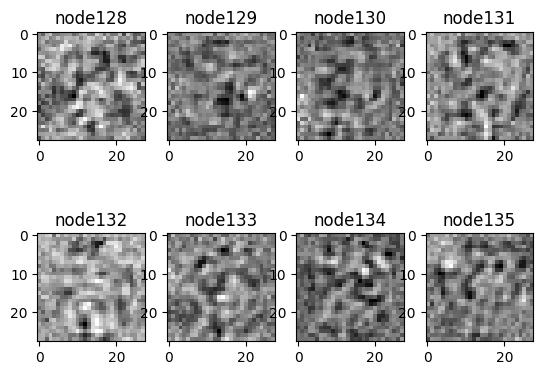

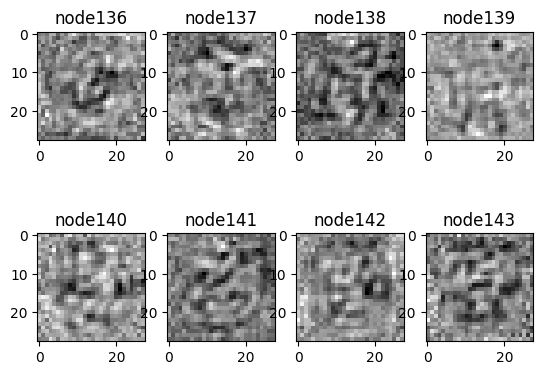

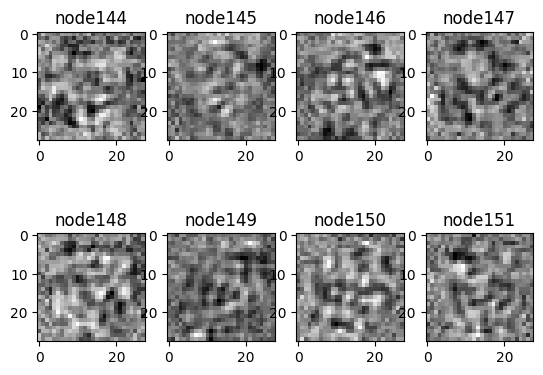

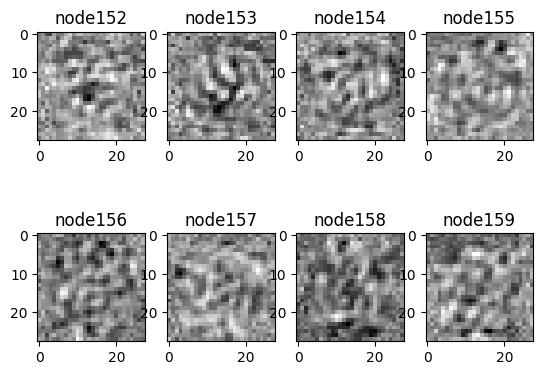

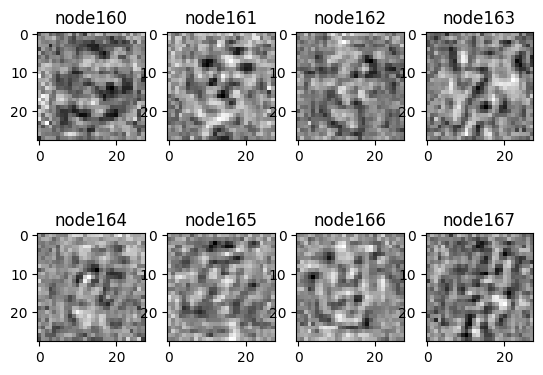

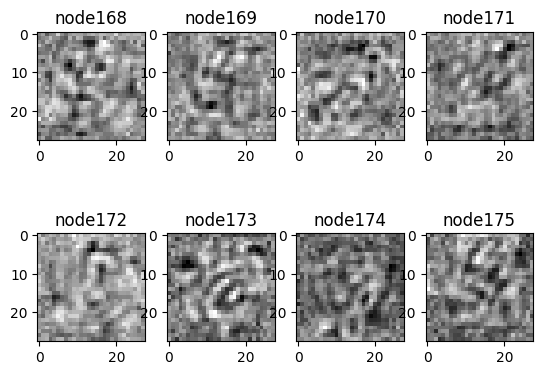

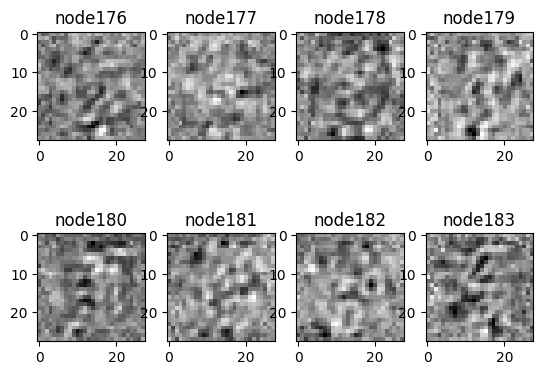

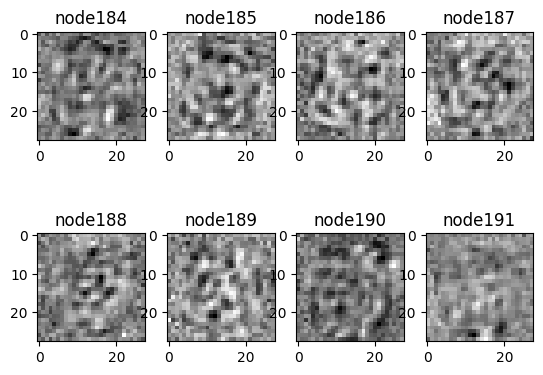

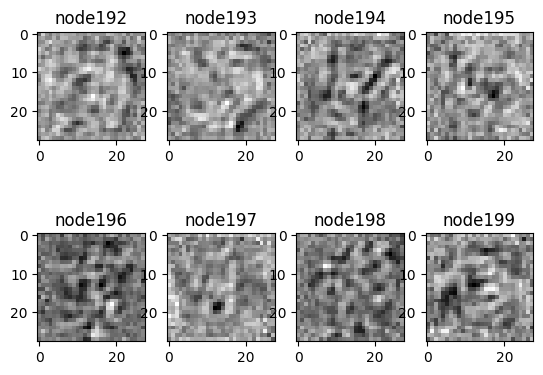

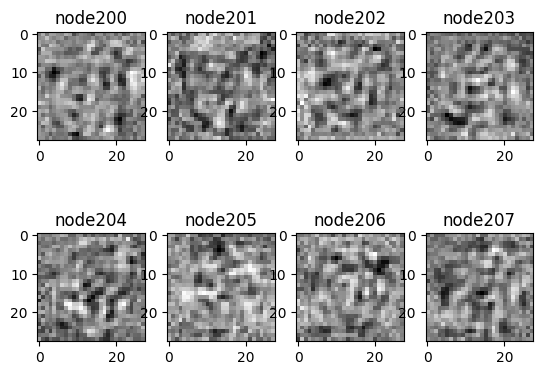

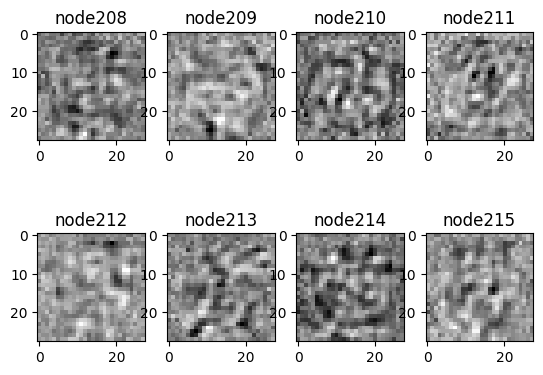

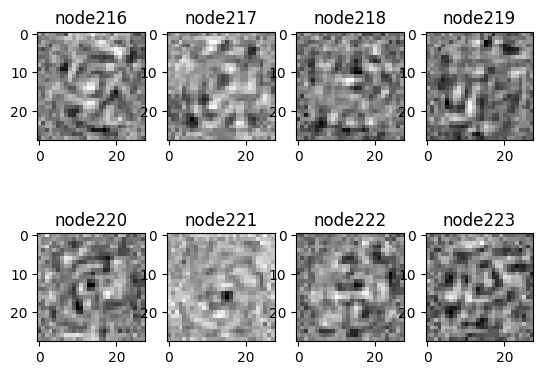

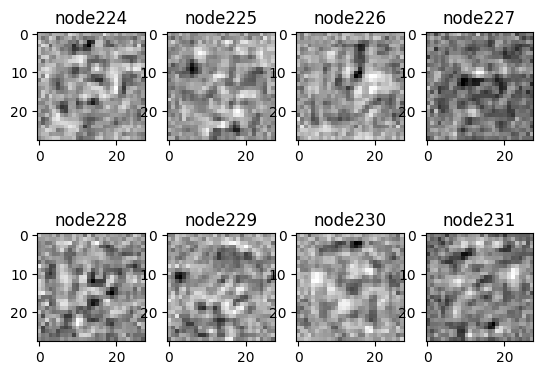

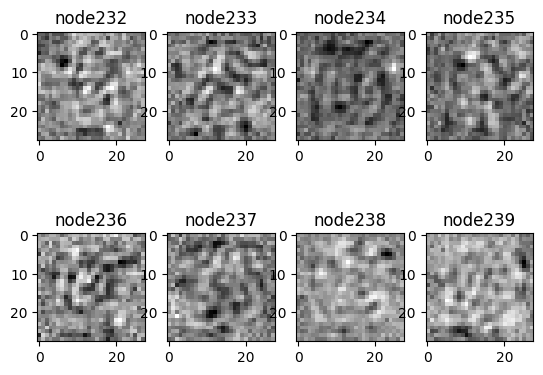

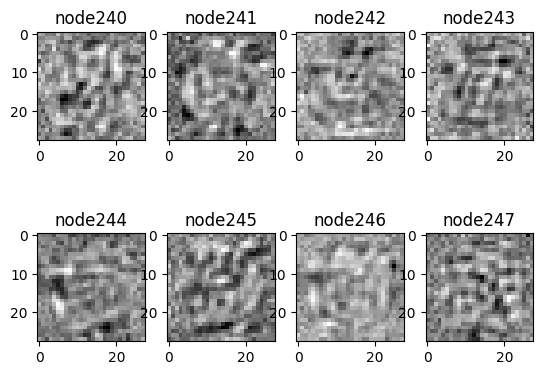

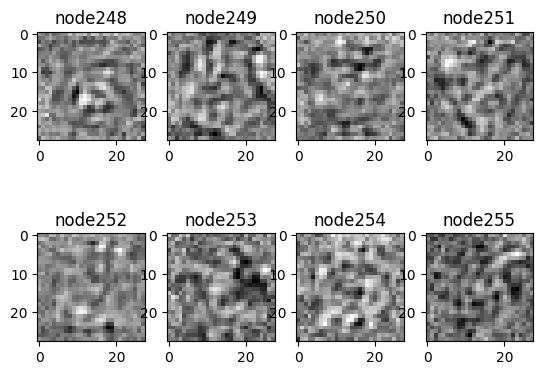

In [188]:
W2=ModelDenoise2.get_weights()[0].T
for i in range(0,W2.shape[0],8):
  plt.subplot(2,4,1)
  plt.title("node{}".format(i))
  plt.imshow(W2[i,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,2)
  plt.title("node{}".format(i+1))
  plt.imshow(W2[i+1,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,3)
  plt.title("node{}".format(i+2))
  plt.imshow(W2[i+2,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,4)
  plt.title("node{}".format(i+3))
  plt.imshow(W2[i+3,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,5)
  plt.title("node{}".format(i+4))
  plt.imshow(W2[i+4,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,6)
  plt.title("node{}".format(i+5))
  plt.imshow(W2[i+5,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,7)
  plt.title("node{}".format(i+6))
  plt.imshow(W2[i+6,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,8)
  plt.title("node{}".format(i+7))
  plt.imshow(W2[i+7,:].reshape((28,28)),cmap="gray")
  plt.show()
  

In [134]:
TrErr2=reconstrutErr(Trpred2,TrDataF)
ValErr2=reconstrutErr(Valpred2,ValDataF)
TestErr2=reconstrutErr(Testpred2,TestDataF)

In [135]:
print("Reconstruction Error for Training:",TrErr2)
print("Reconstruction Error for Validation:",ValErr2)
print("Reconstruction Error for Test:",TestErr2)

Reconstruction Error for Training: 5778423.455423803
Reconstruction Error for Validation: 5822166.648748353
Reconstruction Error for Test: 5802417.88458498


In [144]:
Tr=["D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 3\Group_11\\train\\0\img_5.jpg","D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 3\Group_11\\train\\4\img_78.jpg","D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 3\Group_11\\train\\5\img_51.jpg","D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 3\Group_11\\train\\6\img_133.jpg","D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 3\Group_11\\train\\7\img_18.jpg"]
Val=["D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 3\Group_11\\val\\0\img_260.jpg","D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 3\Group_11\\val\\4\img_1636.jpg","D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 3\Group_11\\val\\5\img_820.jpg","D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 3\Group_11\\val\\6\img_750.jpg","D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 3\Group_11\\val\\7\img_2142.jpg"]
Test=["D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 3\Group_11\\test\\0\img_54.jpg","D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 3\Group_11\\test\\4\img_184.jpg","D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 3\Group_11\\test\\5\img_557.jpg","D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 3\Group_11\\test\\6\img_407.jpg","D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 3\Group_11\\test\\7\img_655.jpg"]

In [146]:
PreTr1=[Trpred1[2,:],Trpred1[2280,:],Trpred1[4556,:],Trpred1[6835,:],Trpred1[9108,:]]
PreTr2=[Trpred2[2,:],Trpred2[2280,:],Trpred2[4556,:],Trpred2[6835,:],Trpred2[9108,:]]

PreVal1=[Valpred1[3,:],Valpred1[785,:],Valpred1[1529,:],Valpred1[2289,:],Valpred1[3069,:]]
PreVal2=[Valpred2[3,:],Valpred2[785,:],Valpred2[1529,:],Valpred2[2289,:],Valpred2[3069,:]]

PreTest1=[Testpred1[1,:],Testpred1[762,:],Testpred1[1525,:],Testpred1[2283,:],Testpred1[3043,:]]
PreTest2=[Testpred2[1,:],Testpred2[762,:],Testpred2[1525,:],Testpred2[2283,:],Testpred2[3043,:]]

Text(0.5, 1.0, 'Original Training data')

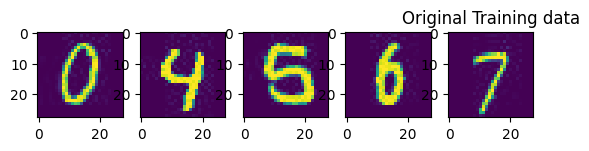

In [141]:
j=1
for i in Tr:
    OrImg=plt.imread(i)
    plt.subplot(1,5,j)
    plt.imshow(OrImg)
    j+=1
plt.title("Original Training data")

Text(0.5, 1.0, 'Reconstructed Training data for 20% noise')

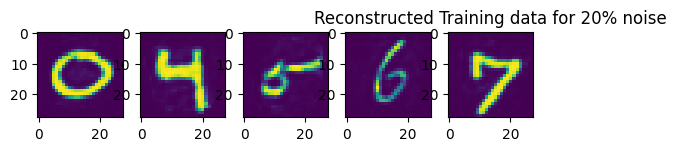

In [156]:
j=1
for i in PreTr1:
    OrImg=i.reshape((28,28))
    plt.subplot(1,5,j)
    plt.imshow(OrImg)
    j+=1
plt.title("Reconstructed Training data for 20% noise")

Text(0.5, 1.0, 'Reconstructed Training data for 40% noise')

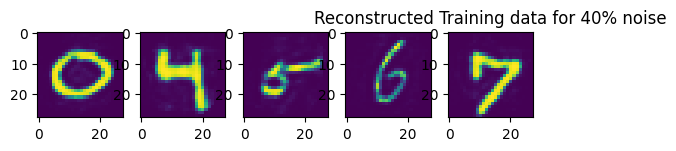

In [157]:
j=1
for i in PreTr2:
    OrImg=i.reshape((28,28))
    plt.subplot(1,5,j)
    plt.imshow(OrImg)
    j+=1
plt.title("Reconstructed Training data for 40% noise")

Text(0.5, 1.0, 'Original Test data')

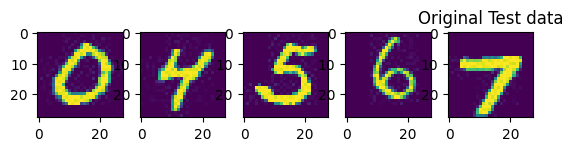

In [142]:
j=1
for i in Test:
    OrImg=plt.imread(i)
    plt.subplot(1,5,j)
    plt.imshow(OrImg)
    j+=1
plt.title("Original Test data")

Text(0.5, 1.0, 'Reconstructed Test data for 20% noise')

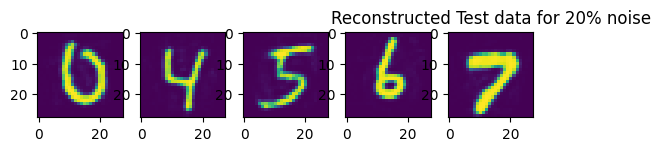

In [158]:
j=1
for i in PreTest1:
    OrImg=i.reshape((28,28))
    plt.subplot(1,5,j)
    plt.imshow(OrImg)
    j+=1
plt.title("Reconstructed Test data for 20% noise")

Text(0.5, 1.0, 'Reconstructed Test data for 40% noise')

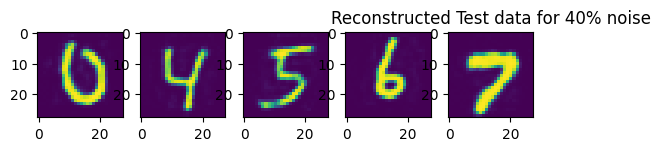

In [159]:
j=1
for i in PreTest2:
    OrImg=i.reshape((28,28))
    plt.subplot(1,5,j)
    plt.imshow(OrImg)
    j+=1
plt.title("Reconstructed Test data for 40% noise")

Text(0.5, 1.0, 'Original Validation data')

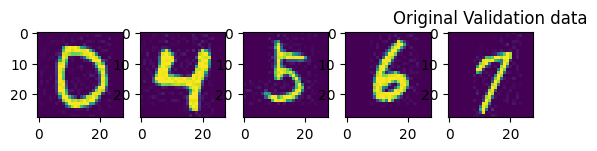

In [145]:
j=1
for i in Val:
    OrImg=plt.imread(i)
    plt.subplot(1,5,j)
    plt.imshow(OrImg)
    j+=1
plt.title("Original Validation data")

Text(0.5, 1.0, 'Reconstructed Validation data for 20% noise')

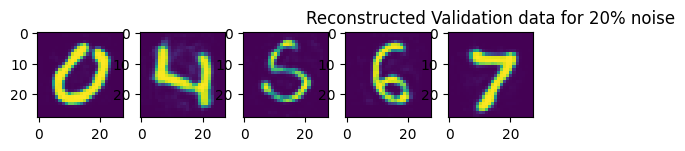

In [160]:
j=1
for i in PreVal1:
    OrImg=i.reshape((28,28))
    plt.subplot(1,5,j)
    plt.imshow(OrImg)
    j+=1
plt.title("Reconstructed Validation data for 20% noise")

Text(0.5, 1.0, 'Reconstructed Test data for 40% noise')

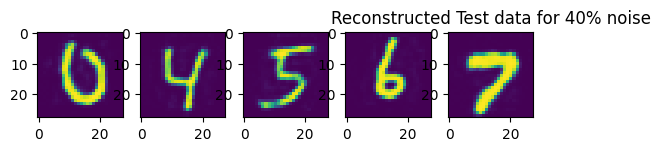

In [161]:
j=1
for i in PreTest2:
    OrImg=i.reshape((28,28))
    plt.subplot(1,5,j)
    plt.imshow(OrImg)
    j+=1
plt.title("Reconstructed Test data for 40% noise")

In [163]:
#input=Input(shape=(28,28),name="InputLayer")
#l=Flatten()(input)
h2=Dense(512,activation="sigmoid",name="HiddenLayer2")(h1)
h3=Dense(256, activation='sigmoid', name="layer3")(h2)
h4=Dense(128, activation='sigmoid', name="layer4")(h3)
outputc=Dense(5, activation='softmax')(h4)
ModelDenoise1Class1=keras.Model(inputs=input,outputs=outputc,name="DenoisingClassifier")

In [164]:
Adam1=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]
ModelDenoise1Class1.compile(optimizer=Adam1,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [165]:
history_denoise1_class1 = ModelDenoise1Class1.fit(x=DenoiseTr1/255.0,y=TrLabel,batch_size=50,epochs=1000,validation_split=0,validation_data=(DenoiseVal1/255.0,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/1000
228/228 [==============================] - 17s 54ms/step - loss: 0.4950 - accuracy: 0.8326 - val_loss: 0.1268 - val_accuracy: 0.9615
Epoch 2/1000
228/228 [==============================] - 10s 43ms/step - loss: 0.1063 - accuracy: 0.9682 - val_loss: 0.1028 - val_accuracy: 0.9694
Epoch 3/1000
228/228 [==============================] - 15s 67ms/step - loss: 0.0792 - accuracy: 0.9760 - val_loss: 0.0965 - val_accuracy: 0.9710
Epoch 4/1000
228/228 [==============================] - 10s 44ms/step - loss: 0.0599 - accuracy: 0.9819 - val_loss: 0.0831 - val_accuracy: 0.9739
Epoch 5/1000
228/228 [==============================] - 10s 44ms/step - loss: 0.0440 - accuracy: 0.9868 - val_loss: 0.0862 - val_accuracy: 0.9747
Epoch 6/1000
228/228 [==============================] - 10s 44ms/step - loss: 0.0347 - accuracy: 0.9909 - val_loss: 0.0826 - val_accuracy: 0.9763
Epoch 7/1000
228/228 [==============================] - 10s 43ms/step - loss: 0.0295 - accuracy: 0.9910 - val_loss: 0.0897 -

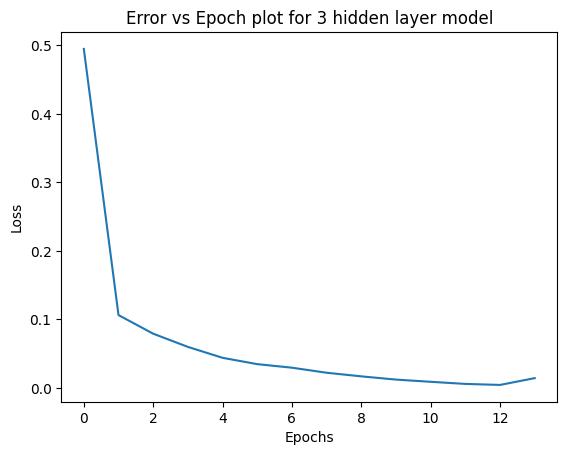

In [166]:
loss120=history_denoise1_class1.history['loss']
plt.plot(loss120)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [167]:
ModelDenoise1Class1.evaluate(x=DenoiseVal1/255.0, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 2s 16ms/step - loss: 0.0793 - accuracy: 0.9816


[0.07930319011211395, 0.9815546870231628]

In [174]:
ModelDenoise1Class1.evaluate(x=DenoiseTest1/255.0, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 2s 16ms/step - loss: 0.0904 - accuracy: 0.9765


[0.09039296954870224, 0.9765480756759644]

In [169]:
#input=Input(shape=(28,28),name="InputLayer")
#l=Flatten()(input)
h22=Dense(512,activation="sigmoid",name="HiddenLayer2")(h12)
h32=Dense(256, activation='sigmoid', name="layer3")(h22)
h42=Dense(128, activation='sigmoid', name="layer4")(h32)
outputc2=Dense(5, activation='softmax')(h42)
ModelDenoise2Class1=keras.Model(inputs=input2,outputs=outputc2,name="DenoisingClassifier2")

In [170]:
Adam1=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]
ModelDenoise2Class1.compile(optimizer=Adam1,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [171]:
history_denoise2_class1 = ModelDenoise2Class1.fit(x=DenoiseTr2/255.0,y=TrLabel,batch_size=50,epochs=1000,validation_split=0,validation_data=(DenoiseVal2/255.0,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/1000
228/228 [==============================] - 17s 48ms/step - loss: 0.5934 - accuracy: 0.7998 - val_loss: 0.1433 - val_accuracy: 0.9586
Epoch 2/1000
228/228 [==============================] - 11s 48ms/step - loss: 0.1199 - accuracy: 0.9639 - val_loss: 0.1127 - val_accuracy: 0.9665
Epoch 3/1000
228/228 [==============================] - 11s 47ms/step - loss: 0.0804 - accuracy: 0.9753 - val_loss: 0.0895 - val_accuracy: 0.9739
Epoch 4/1000
228/228 [==============================] - 12s 53ms/step - loss: 0.0634 - accuracy: 0.9813 - val_loss: 0.1251 - val_accuracy: 0.9642
Epoch 5/1000
228/228 [==============================] - 10s 45ms/step - loss: 0.0515 - accuracy: 0.9857 - val_loss: 0.0800 - val_accuracy: 0.9768
Epoch 6/1000
228/228 [==============================] - 9s 40ms/step - loss: 0.0416 - accuracy: 0.9875 - val_loss: 0.0944 - val_accuracy: 0.9731
Epoch 7/1000
228/228 [==============================] - 10s 42ms/step - loss: 0.0350 - accuracy: 0.9893 - val_loss: 0.0739 - 

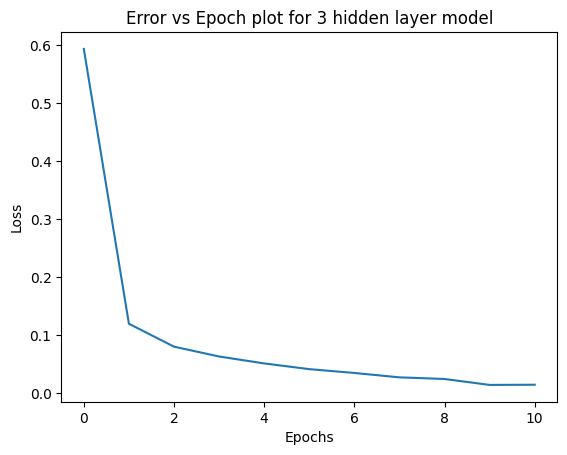

In [172]:
loss140=history_denoise2_class1.history['loss']
plt.plot(loss140)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [173]:
ModelDenoise2Class1.evaluate(x=DenoiseVal2/255.0, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 2s 15ms/step - loss: 0.0788 - accuracy: 0.9800


[0.07878249138593674, 0.9799736738204956]

In [175]:
ModelDenoise2Class1.evaluate(x=DenoiseTest2/255.0, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 2s 15ms/step - loss: 0.0840 - accuracy: 0.9792


[0.0839671939611435, 0.9791831374168396]

In [190]:
input22=Input(shape=(784,),name="InputLayer")
h122=Dense(256,activation="sigmoid",name="HiddenLayer1")(input22)
#h1=Dense(256,activation="sigmoid",name="HiddenLayer1")(l)
output2=Dense(784,activation="sigmoid",name="OutputLayer")(h122)
ModelDenoise22=keras.Model(inputs=input22,outputs=output2,name="DenoisingAutoencoder2")

In [192]:
opt=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',patience=1, min_delta=0.0001)]

ModelDenoise22.compile(optimizer=opt,loss="mse",metrics=['accuracy'])

In [193]:
history_denoise22 = ModelDenoise22.fit(x=DenoiseTr2/255.0,y=TrDataF/255.0,batch_size=50,epochs=1000,validation_split=0,validation_data=(DenoiseVal2/255.0,ValDataF/255.0),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/1000
228/228 [==============================] - 14s 41ms/step - loss: 0.0589 - accuracy: 0.0018 - val_loss: 0.0405 - val_accuracy: 2.6350e-04
Epoch 2/1000
228/228 [==============================] - 8s 36ms/step - loss: 0.0335 - accuracy: 0.0025 - val_loss: 0.0283 - val_accuracy: 0.0026
Epoch 3/1000
228/228 [==============================] - 10s 45ms/step - loss: 0.0243 - accuracy: 0.0023 - val_loss: 0.0213 - val_accuracy: 0.0018
Epoch 4/1000
228/228 [==============================] - 9s 41ms/step - loss: 0.0188 - accuracy: 0.0027 - val_loss: 0.0169 - val_accuracy: 0.0029
Epoch 5/1000
228/228 [==============================] - 9s 39ms/step - loss: 0.0151 - accuracy: 0.0032 - val_loss: 0.0139 - val_accuracy: 0.0047
Epoch 6/1000
228/228 [==============================] - 10s 44ms/step - loss: 0.0126 - accuracy: 0.0041 - val_loss: 0.0117 - val_accuracy: 0.0050
Epoch 7/1000
228/228 [==============================] - 10s 42ms/step - loss: 0.0107 - accuracy: 0.0056 - val_loss: 0.0101 

In [195]:
#input=Input(shape=(28,28),name="InputLayer")
#l=Flatten()(input)
h222=Dense(100,activation="sigmoid",name="HiddenLayer2")(h122)
h322=Dense(200, activation='sigmoid', name="layer3")(h222)
h422=Dense(100, activation='sigmoid', name="layer4")(h322)
outputc22=Dense(5, activation='softmax')(h422)
ModelDenoise2Class2=keras.Model(inputs=input22,outputs=outputc22,name="DenoisingClassifier2")

In [196]:
Adam1=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]
ModelDenoise2Class2.compile(optimizer=Adam1,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [197]:
history_denoise2_class2 = ModelDenoise2Class2.fit(x=DenoiseTr2/255.0,y=TrLabel,batch_size=50,epochs=1000,validation_split=0,validation_data=(DenoiseVal2/255.0,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/1000
228/228 [==============================] - 13s 31ms/step - loss: 0.7348 - accuracy: 0.7513 - val_loss: 0.1459 - val_accuracy: 0.9607
Epoch 2/1000
228/228 [==============================] - 6s 25ms/step - loss: 0.1100 - accuracy: 0.9685 - val_loss: 0.0970 - val_accuracy: 0.9721
Epoch 3/1000
228/228 [==============================] - 6s 26ms/step - loss: 0.0772 - accuracy: 0.9776 - val_loss: 0.0840 - val_accuracy: 0.9752
Epoch 4/1000
228/228 [==============================] - 8s 36ms/step - loss: 0.0615 - accuracy: 0.9829 - val_loss: 0.0828 - val_accuracy: 0.9736
Epoch 5/1000
228/228 [==============================] - 8s 35ms/step - loss: 0.0478 - accuracy: 0.9872 - val_loss: 0.0793 - val_accuracy: 0.9760
Epoch 6/1000
228/228 [==============================] - 7s 29ms/step - loss: 0.0388 - accuracy: 0.9888 - val_loss: 0.0688 - val_accuracy: 0.9797
Epoch 7/1000
228/228 [==============================] - 6s 26ms/step - loss: 0.0304 - accuracy: 0.9909 - val_loss: 0.0713 - val_a

In [198]:
ModelDenoise2Class2.evaluate(x=DenoiseVal2/255.0, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 1s 11ms/step - loss: 0.0781 - accuracy: 0.9831


[0.07810302078723907, 0.9831357002258301]

In [199]:
ModelDenoise2Class2.evaluate(x=DenoiseTest2/255.0, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 1s 11ms/step - loss: 0.0842 - accuracy: 0.9792


[0.08420944958925247, 0.9791831374168396]

In [200]:
input21=Input(shape=(784,),name="InputLayer")
h121=Dense(256,activation="sigmoid",name="HiddenLayer1")(input21)
#h1=Dense(256,activation="sigmoid",name="HiddenLayer1")(l)
output1=Dense(784,activation="sigmoid",name="OutputLayer")(h121)
ModelDenoise11=keras.Model(inputs=input21,outputs=output1,name="DenoisingAutoencoder2")

In [201]:
opt=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',patience=1, min_delta=0.0001)]

ModelDenoise11.compile(optimizer=opt,loss="mse",metrics=['accuracy'])

In [202]:
history_denoise11 = ModelDenoise11.fit(x=DenoiseTr1/255.0,y=TrDataF/255.0,batch_size=50,epochs=1000,validation_split=0,validation_data=(DenoiseVal1/255.0,ValDataF/255.0),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/1000
228/228 [==============================] - 13s 43ms/step - loss: 0.0579 - accuracy: 0.0011 - val_loss: 0.0390 - val_accuracy: 0.0016
Epoch 2/1000
228/228 [==============================] - 7s 31ms/step - loss: 0.0321 - accuracy: 0.0028 - val_loss: 0.0268 - val_accuracy: 0.0034
Epoch 3/1000
228/228 [==============================] - 7s 30ms/step - loss: 0.0229 - accuracy: 0.0028 - val_loss: 0.0200 - val_accuracy: 0.0029
Epoch 4/1000
228/228 [==============================] - 7s 30ms/step - loss: 0.0176 - accuracy: 0.0029 - val_loss: 0.0158 - val_accuracy: 0.0040
Epoch 5/1000
228/228 [==============================] - 6s 26ms/step - loss: 0.0141 - accuracy: 0.0029 - val_loss: 0.0129 - val_accuracy: 0.0053
Epoch 6/1000
228/228 [==============================] - 7s 31ms/step - loss: 0.0116 - accuracy: 0.0039 - val_loss: 0.0109 - val_accuracy: 0.0042
Epoch 7/1000
228/228 [==============================] - 7s 29ms/step - loss: 0.0099 - accuracy: 0.0047 - val_loss: 0.0094 - val_a

In [203]:
#input=Input(shape=(28,28),name="InputLayer")
#l=Flatten()(input)
h221=Dense(100,activation="sigmoid",name="HiddenLayer2")(h121)
h321=Dense(200, activation='sigmoid', name="layer3")(h221)
h421=Dense(100, activation='sigmoid', name="layer4")(h321)
outputc21=Dense(5, activation='softmax')(h421)
ModelDenoise1Class2=keras.Model(inputs=input21,outputs=outputc21,name="DenoisingClassifier2")

In [205]:
Adam1=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]
ModelDenoise1Class2.compile(optimizer=Adam1,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [206]:
history_denoise1_class2 = ModelDenoise1Class2.fit(x=DenoiseTr1/255.0,y=TrLabel,batch_size=50,epochs=1000,validation_split=0,validation_data=(DenoiseVal1/255.0,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/1000
228/228 [==============================] - 13s 31ms/step - loss: 0.6918 - accuracy: 0.7781 - val_loss: 0.1411 - val_accuracy: 0.9634
Epoch 2/1000
228/228 [==============================] - 7s 30ms/step - loss: 0.1070 - accuracy: 0.9703 - val_loss: 0.0948 - val_accuracy: 0.9721
Epoch 3/1000
228/228 [==============================] - 7s 29ms/step - loss: 0.0719 - accuracy: 0.9798 - val_loss: 0.0920 - val_accuracy: 0.9710
Epoch 4/1000
228/228 [==============================] - 7s 31ms/step - loss: 0.0543 - accuracy: 0.9849 - val_loss: 0.1049 - val_accuracy: 0.9684
Epoch 5/1000
228/228 [==============================] - 6s 28ms/step - loss: 0.0427 - accuracy: 0.9881 - val_loss: 0.0723 - val_accuracy: 0.9781
Epoch 6/1000
228/228 [==============================] - 6s 27ms/step - loss: 0.0340 - accuracy: 0.9903 - val_loss: 0.0752 - val_accuracy: 0.9760
Epoch 7/1000
228/228 [==============================] - 6s 26ms/step - loss: 0.0261 - accuracy: 0.9925 - val_loss: 0.0720 - val_a

In [207]:
ModelDenoise1Class2.evaluate(x=DenoiseVal1/255.0, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 1s 12ms/step - loss: 0.0767 - accuracy: 0.9802


[0.07670672237873077, 0.9802371263504028]

In [208]:
ModelDenoise1Class2.evaluate(x=DenoiseTest1/255.0, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 1s 12ms/step - loss: 0.0717 - accuracy: 0.9823


[0.07169491797685623, 0.9823451638221741]

In [6]:
#input=Input(shape=(28,28),name="InputLayer")
#l=Flatten()(input)
#h1=Dense(256,activation="sigmoid",name="HiddenLayer1")(l)
input3=Input(shape=(784,),name="InputLayer")
h13=Dense(256,activation="sigmoid",name="HiddenLayer1")(input3)
output3=Dense(784,activation="sigmoid",name="OutputLayer")(h13)
ModelDenoise3=keras.Model(inputs=input3,outputs=output3,name="DenoisingAutoencoder")

In [7]:
opt=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',patience=1, min_delta=0.0001)]

ModelDenoise3.compile(optimizer=opt,loss="mse",metrics=['accuracy'])

In [12]:
history_denoise3 = ModelDenoise3.fit(x=DenoiseTr1/255.0,y=TrDataF/255.0,batch_size=50,epochs=1000,validation_split=0,validation_data=(DenoiseVal1/255.0,ValDataF/255.0),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/1000
228/228 [==============================] - 16s 51ms/step - loss: 0.0577 - accuracy: 0.0016 - val_loss: 0.0389 - val_accuracy: 0.0018
Epoch 2/1000
228/228 [==============================] - 9s 41ms/step - loss: 0.0320 - accuracy: 0.0029 - val_loss: 0.0266 - val_accuracy: 0.0026
Epoch 3/1000
228/228 [==============================] - 9s 41ms/step - loss: 0.0229 - accuracy: 0.0025 - val_loss: 0.0199 - val_accuracy: 0.0026
Epoch 4/1000
228/228 [==============================] - 9s 39ms/step - loss: 0.0175 - accuracy: 0.0033 - val_loss: 0.0157 - val_accuracy: 0.0024
Epoch 5/1000
228/228 [==============================] - 9s 39ms/step - loss: 0.0140 - accuracy: 0.0031 - val_loss: 0.0129 - val_accuracy: 0.0047
Epoch 6/1000
228/228 [==============================] - 9s 39ms/step - loss: 0.0116 - accuracy: 0.0040 - val_loss: 0.0108 - val_accuracy: 0.0061
Epoch 7/1000
228/228 [==============================] - 9s 40ms/step - loss: 0.0099 - accuracy: 0.0050 - val_loss: 0.0094 - val_a

In [20]:
Trpred3=ModelDenoise3.predict(DenoiseTr1/255.0)
Testpred3=ModelDenoise3.predict(DenoiseTest1/255.0)
Valpred3=ModelDenoise3.predict(DenoiseVal1/255.0)

119/119 [==============================] - 1s 7ms/step


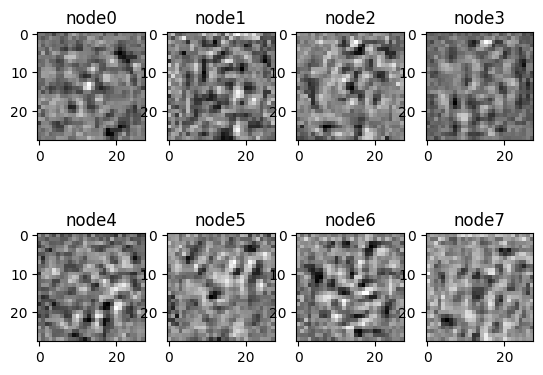

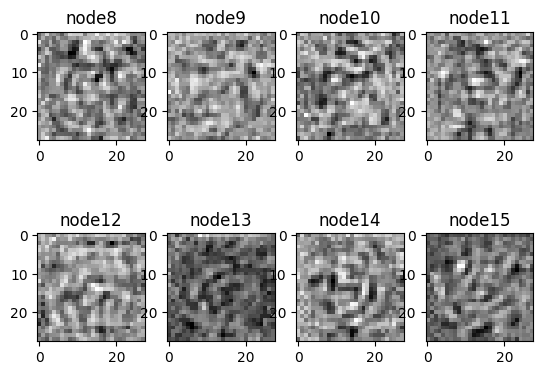

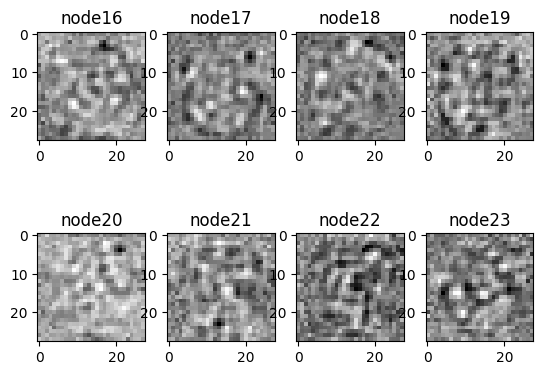

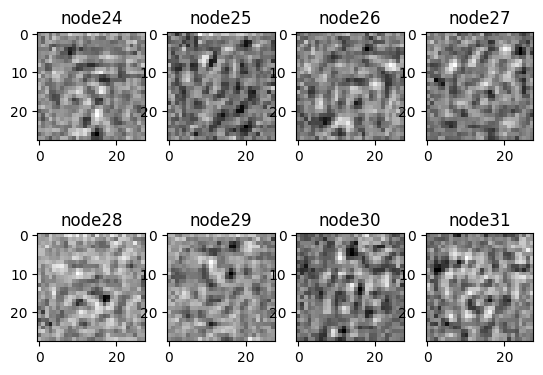

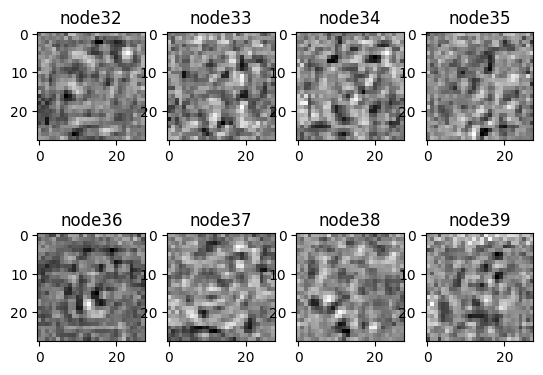

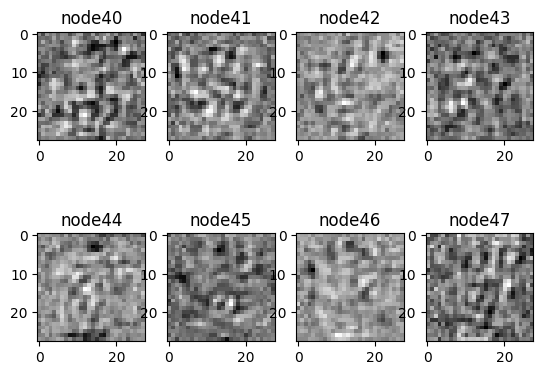

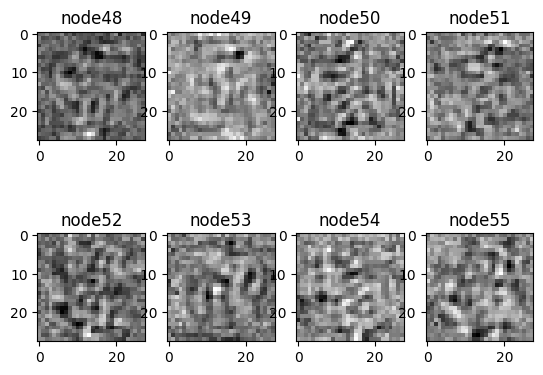

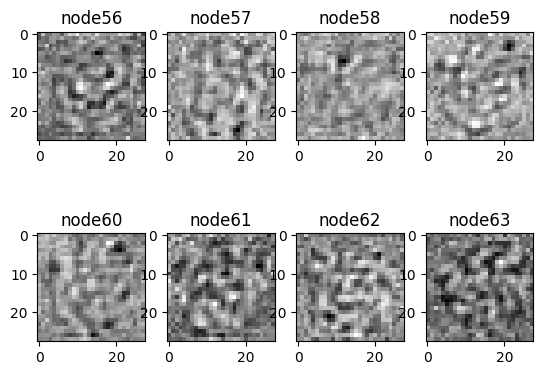

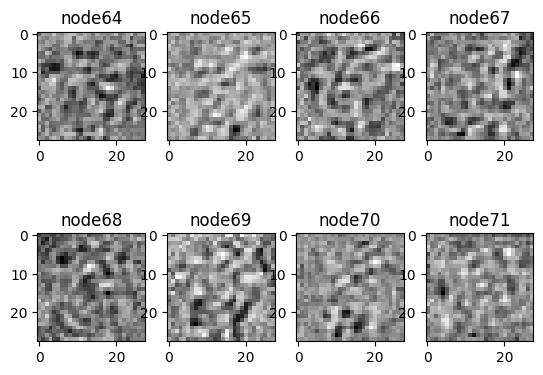

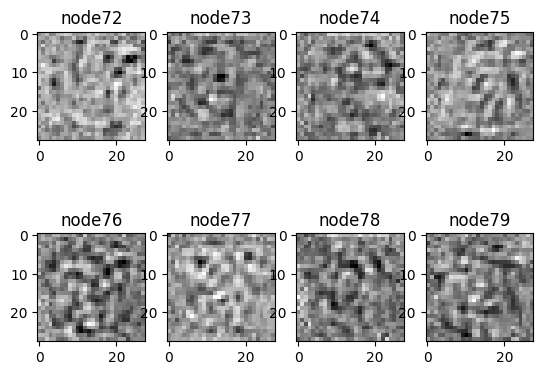

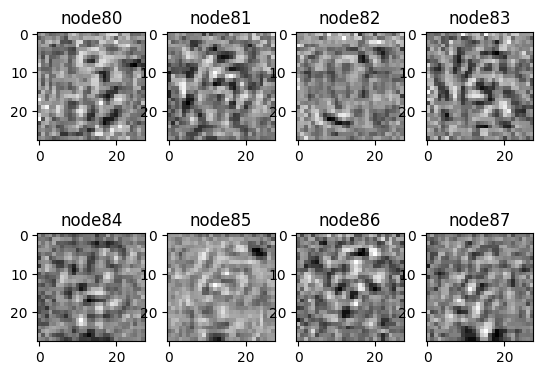

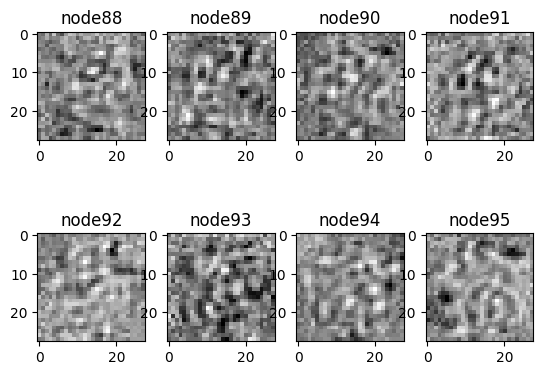

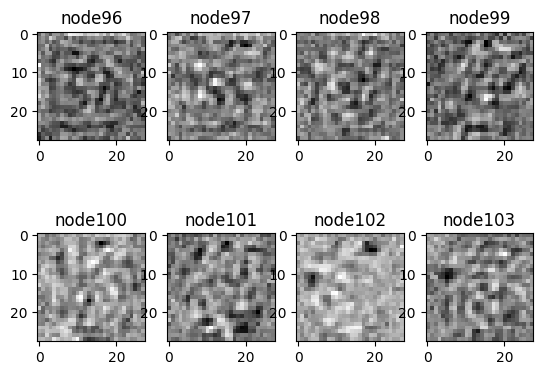

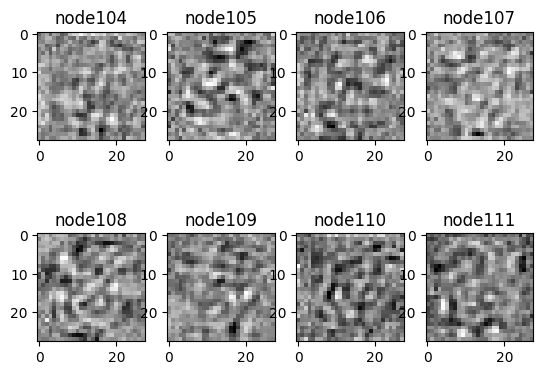

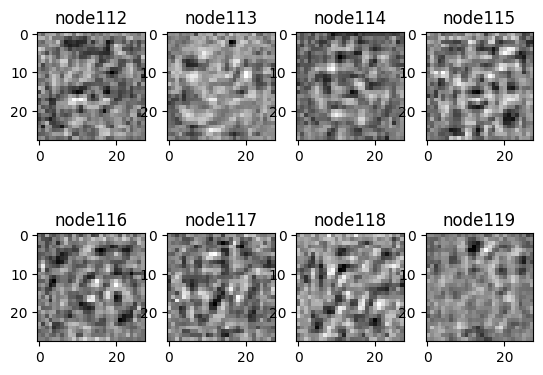

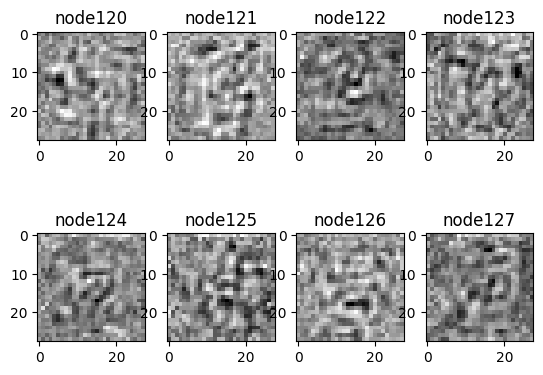

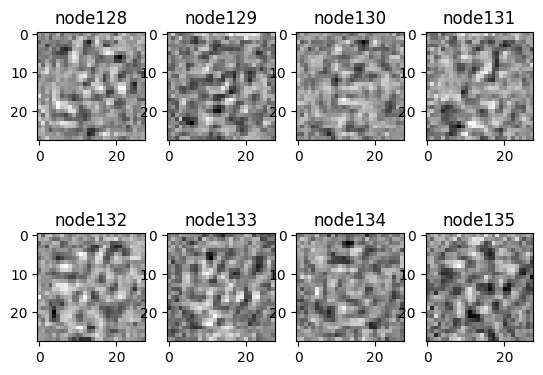

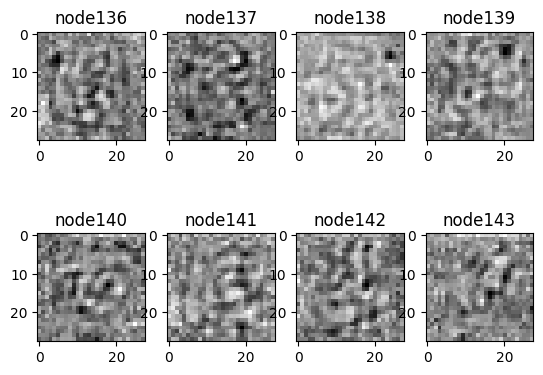

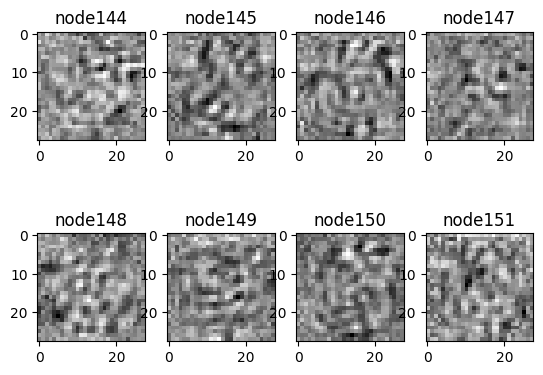

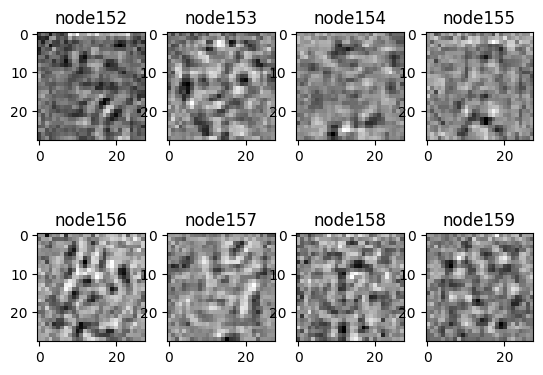

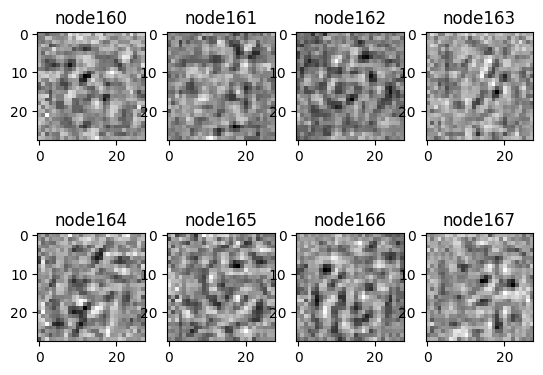

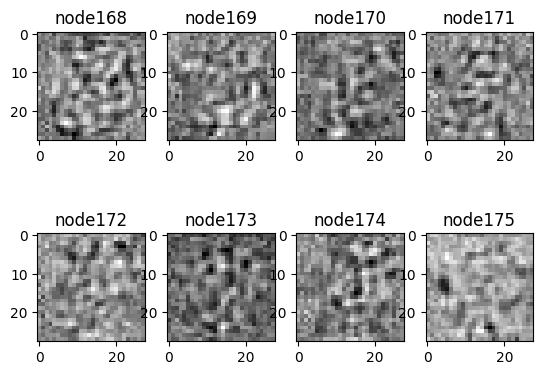

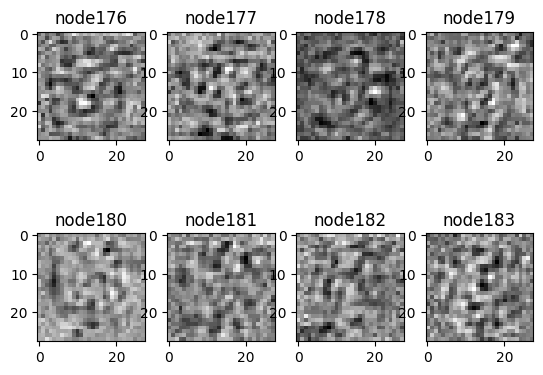

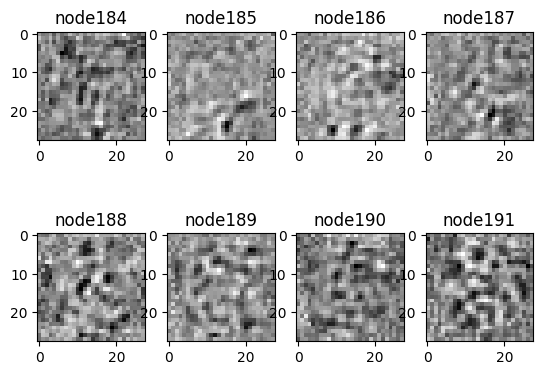

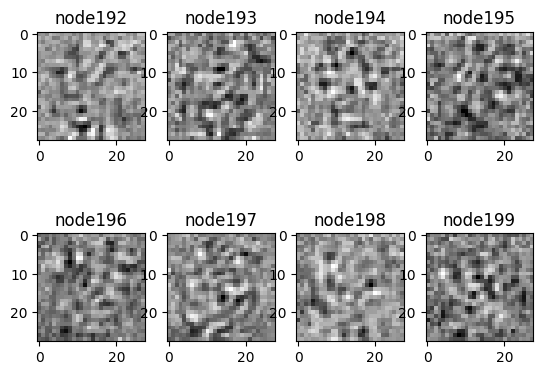

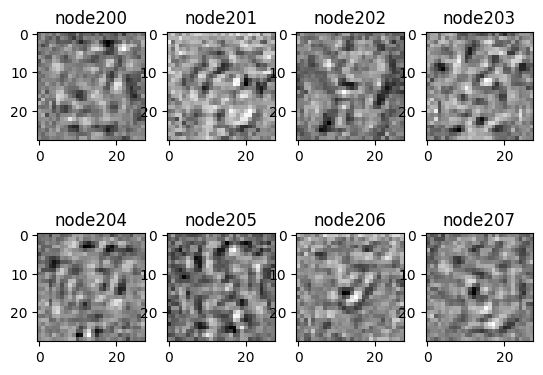

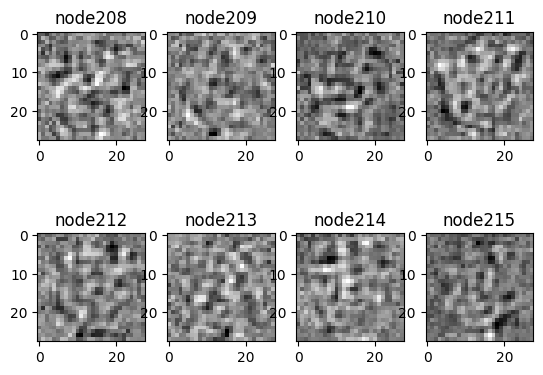

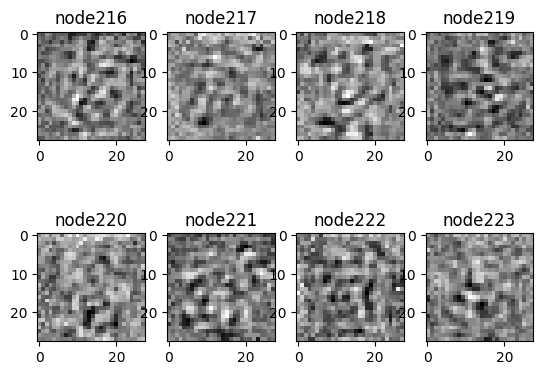

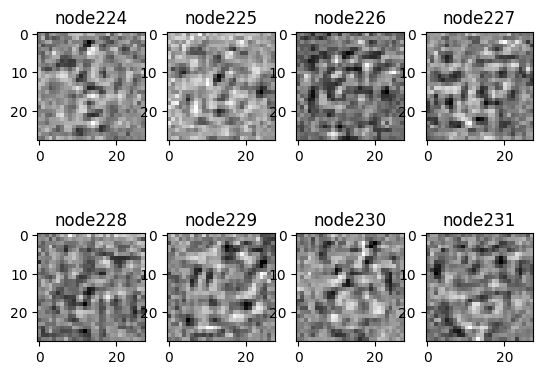

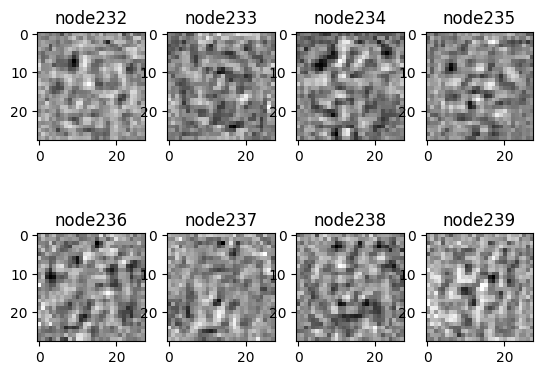

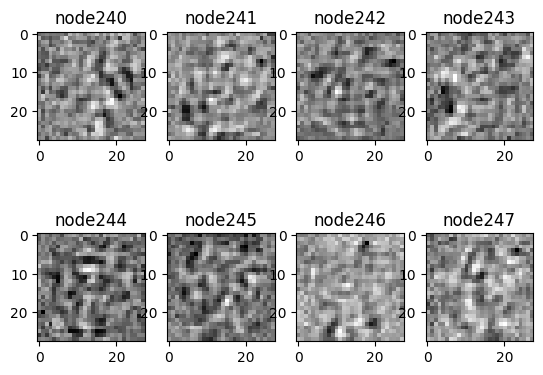

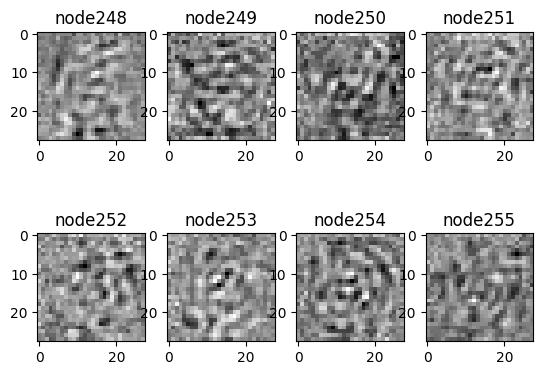

In [14]:
W3=ModelDenoise3.get_weights()[0].T
for i in range(0,W3.shape[0],8):
  plt.subplot(2,4,1)
  plt.title("node{}".format(i))
  plt.imshow(W3[i,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,2)
  plt.title("node{}".format(i+1))
  plt.imshow(W3[i+1,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,3)
  plt.title("node{}".format(i+2))
  plt.imshow(W3[i+2,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,4)
  plt.title("node{}".format(i+3))
  plt.imshow(W3[i+3,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,5)
  plt.title("node{}".format(i+4))
  plt.imshow(W3[i+4,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,6)
  plt.title("node{}".format(i+5))
  plt.imshow(W3[i+5,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,7)
  plt.title("node{}".format(i+6))
  plt.imshow(W3[i+6,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,8)
  plt.title("node{}".format(i+7))
  plt.imshow(W3[i+7,:].reshape((28,28)),cmap="gray")
  plt.show()

In [21]:
TrErr3=reconstrutErr(Trpred3,TrDataF)
ValErr3=reconstrutErr(Valpred3,ValDataF)
TestErr3=reconstrutErr(Testpred3,TestDataF)

In [22]:
print("Reconstruction Error for Training:",TrErr3)
print("Reconstruction Error for Validation:",ValErr3)
print("Reconstruction Error for Test:",TestErr3)

Reconstruction Error for Training: 5778284.583574879
Reconstruction Error for Validation: 5822050.082740448
Reconstruction Error for Test: 5802288.366798419


In [23]:
#input=Input(shape=(28,28),name="InputLayer")
#l=Flatten()(input)
h23=Dense(100,activation="sigmoid",name="HiddenLayer2")(h13)
h33=Dense(200, activation='sigmoid', name="layer3")(h23)
h43=Dense(100, activation='sigmoid', name="layer4")(h33)
outputc3=Dense(5, activation='softmax')(h43)
ModelDenoise1Class2=keras.Model(inputs=input3,outputs=outputc3,name="DenoisingClassifier")

In [24]:
Adam1=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]
ModelDenoise1Class2.compile(optimizer=Adam1,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [25]:
history_denoise1_class2 = ModelDenoise1Class2.fit(x=DenoiseTr1/255.0,y=TrLabel,batch_size=50,epochs=1000,validation_split=0,validation_data=(DenoiseVal1/255.0,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/1000
228/228 [==============================] - 19s 36ms/step - loss: 0.6630 - accuracy: 0.7838 - val_loss: 0.1588 - val_accuracy: 0.9576
Epoch 2/1000
228/228 [==============================] - 7s 30ms/step - loss: 0.1198 - accuracy: 0.9656 - val_loss: 0.1174 - val_accuracy: 0.9634
Epoch 3/1000
228/228 [==============================] - 6s 28ms/step - loss: 0.0824 - accuracy: 0.9766 - val_loss: 0.0905 - val_accuracy: 0.9736
Epoch 4/1000
228/228 [==============================] - 7s 29ms/step - loss: 0.0590 - accuracy: 0.9839 - val_loss: 0.0899 - val_accuracy: 0.9734
Epoch 5/1000
228/228 [==============================] - 7s 29ms/step - loss: 0.0465 - accuracy: 0.9877 - val_loss: 0.0786 - val_accuracy: 0.9771
Epoch 6/1000
228/228 [==============================] - 6s 27ms/step - loss: 0.0327 - accuracy: 0.9919 - val_loss: 0.0891 - val_accuracy: 0.9739
Epoch 7/1000
228/228 [==============================] - 7s 31ms/step - loss: 0.0242 - accuracy: 0.9941 - val_loss: 0.0811 - val_a

In [26]:
ModelDenoise1Class2.evaluate(x=DenoiseVal1/255.0, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 1s 12ms/step - loss: 0.0818 - accuracy: 0.9834


[0.08176276832818985, 0.9833992123603821]

In [27]:
ModelDenoise1Class2.evaluate(x=DenoiseTest1/255.0, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 1s 11ms/step - loss: 0.0745 - accuracy: 0.9821


[0.07447711378335953, 0.9820817112922668]

In [28]:
input4=Input(shape=(784,),name="InputLayer")
h14=Dense(256,activation="sigmoid",name="HiddenLayer1")(input4)
#h1=Dense(256,activation="sigmoid",name="HiddenLayer1")(l)
output4=Dense(784,activation="sigmoid",name="OutputLayer")(h14)
ModelDenoise4=keras.Model(inputs=input4,outputs=output4,name="DenoisingAutoencoder2")

In [29]:
opt=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',patience=1, min_delta=0.0001)]

ModelDenoise4.compile(optimizer=opt,loss="mse",metrics=['accuracy'])

In [30]:
history_denoise4 = ModelDenoise4.fit(x=DenoiseTr2/255.0,y=TrDataF/255.0,batch_size=50,epochs=1000,validation_split=0,validation_data=(DenoiseVal2/255.0,ValDataF/255.0),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/1000
228/228 [==============================] - 14s 46ms/step - loss: 0.0591 - accuracy: 0.0018 - val_loss: 0.0407 - val_accuracy: 0.0018
Epoch 2/1000
228/228 [==============================] - 9s 41ms/step - loss: 0.0338 - accuracy: 0.0025 - val_loss: 0.0285 - val_accuracy: 0.0018
Epoch 3/1000
228/228 [==============================] - 7s 32ms/step - loss: 0.0245 - accuracy: 0.0028 - val_loss: 0.0214 - val_accuracy: 0.0037
Epoch 4/1000
228/228 [==============================] - 7s 32ms/step - loss: 0.0189 - accuracy: 0.0037 - val_loss: 0.0170 - val_accuracy: 0.0032
Epoch 5/1000
228/228 [==============================] - 9s 39ms/step - loss: 0.0152 - accuracy: 0.0038 - val_loss: 0.0140 - val_accuracy: 0.0040
Epoch 6/1000
228/228 [==============================] - 9s 41ms/step - loss: 0.0126 - accuracy: 0.0040 - val_loss: 0.0118 - val_accuracy: 0.0040
Epoch 7/1000
228/228 [==============================] - 8s 36ms/step - loss: 0.0107 - accuracy: 0.0049 - val_loss: 0.0102 - val_a

In [31]:
Trpred4=ModelDenoise4.predict(DenoiseTr2/255.0)
Testpred4=ModelDenoise4.predict(DenoiseTest2/255.0)
Valpred4=ModelDenoise4.predict(DenoiseVal2/255.0)

119/119 [==============================] - 1s 10ms/step


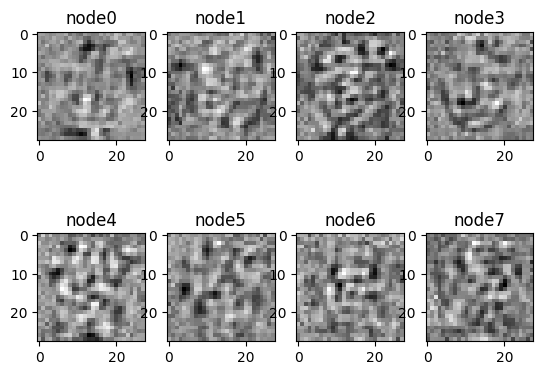

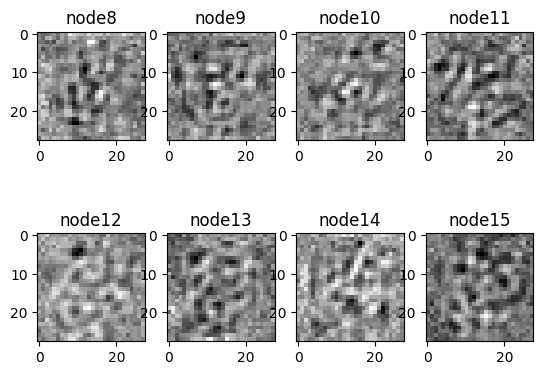

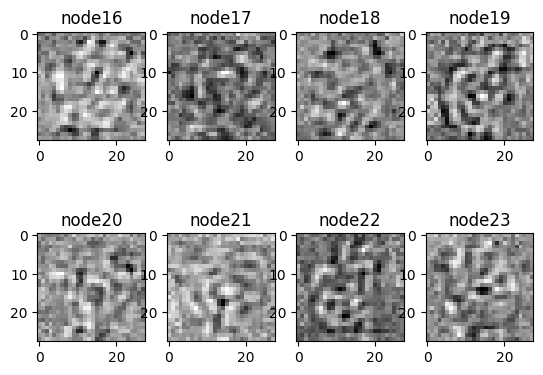

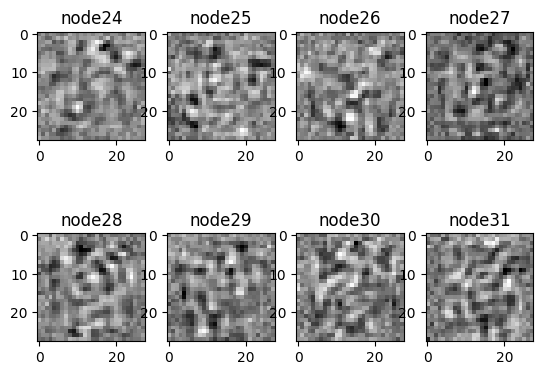

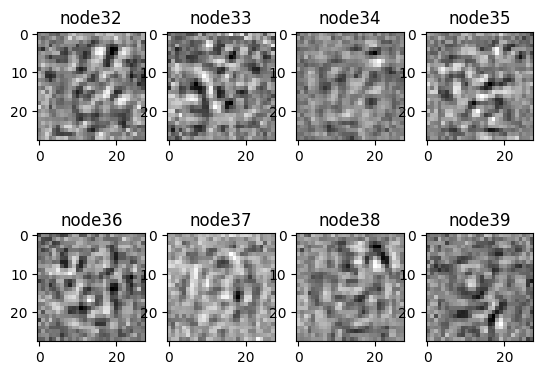

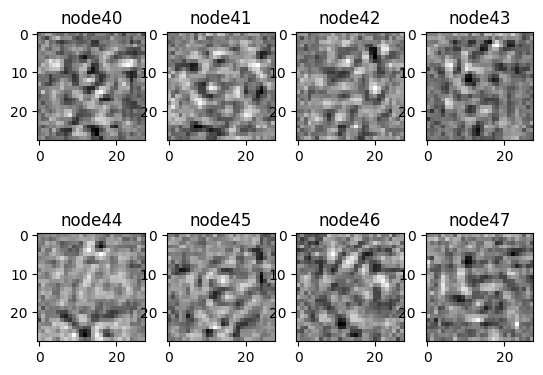

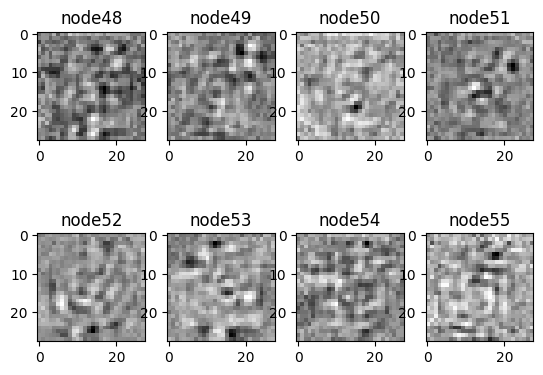

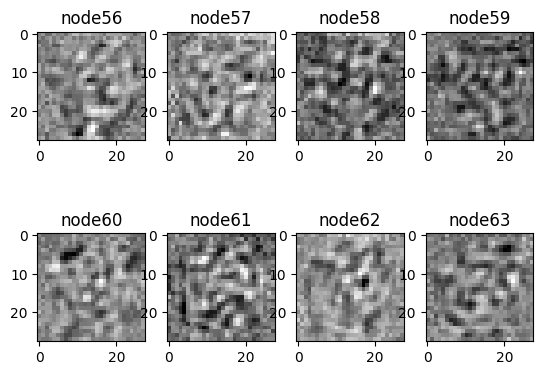

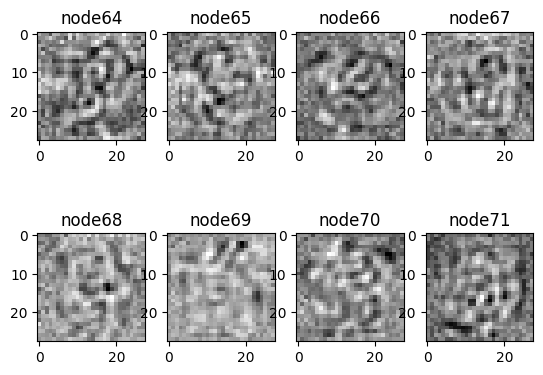

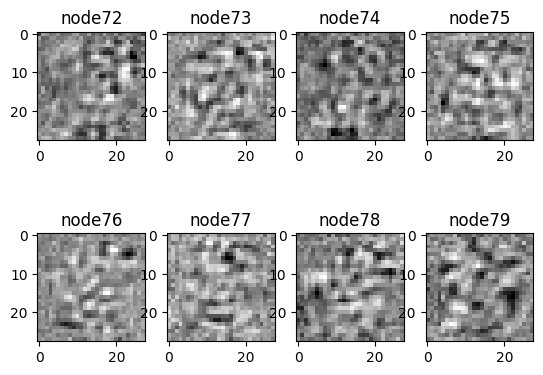

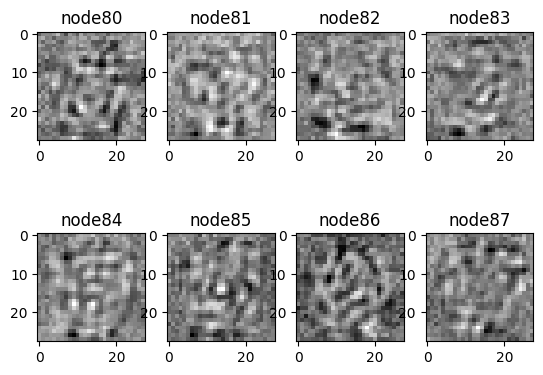

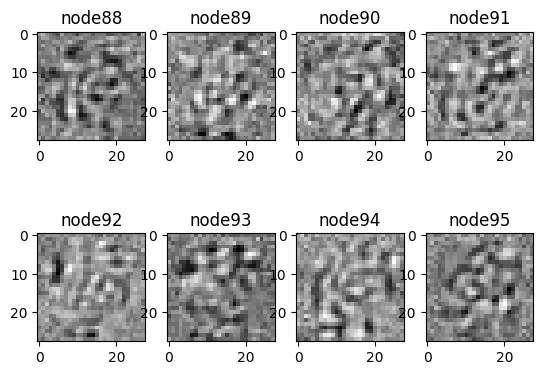

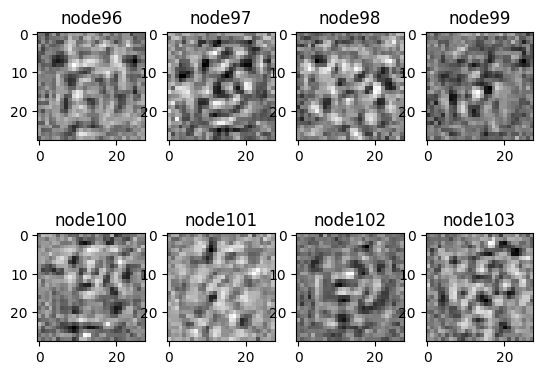

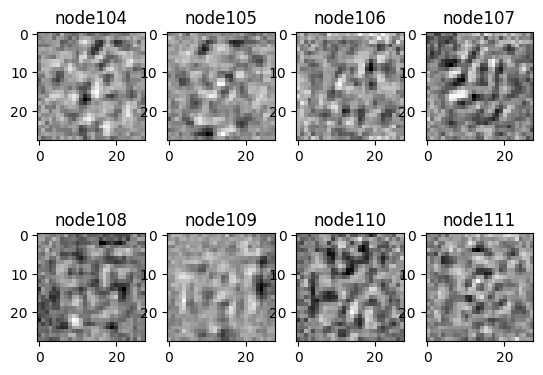

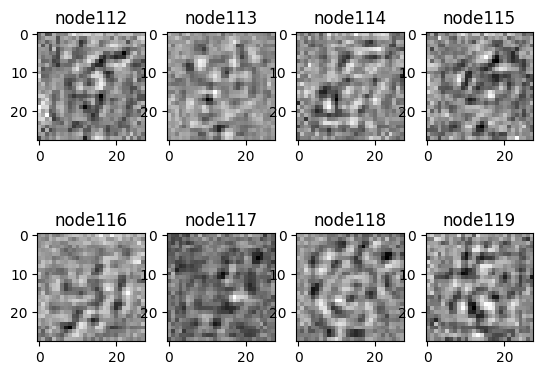

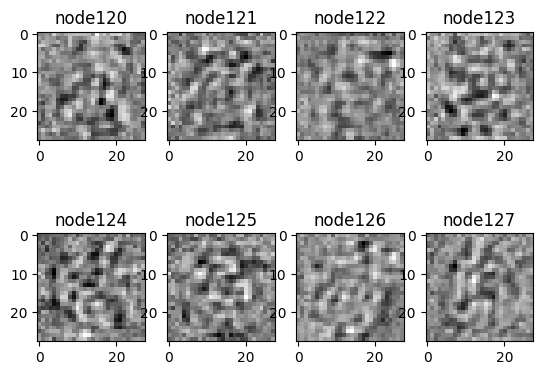

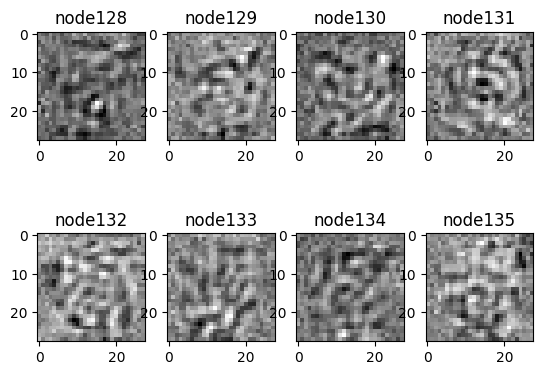

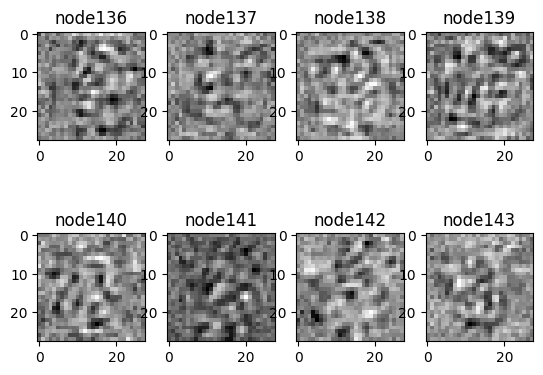

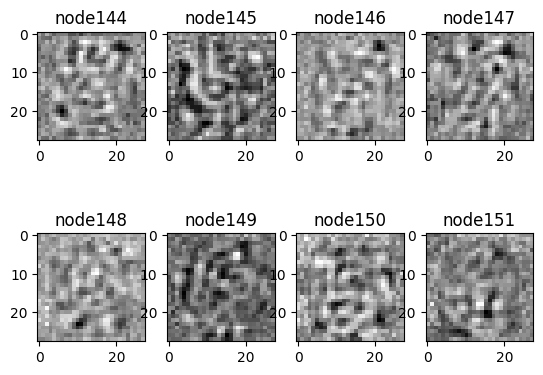

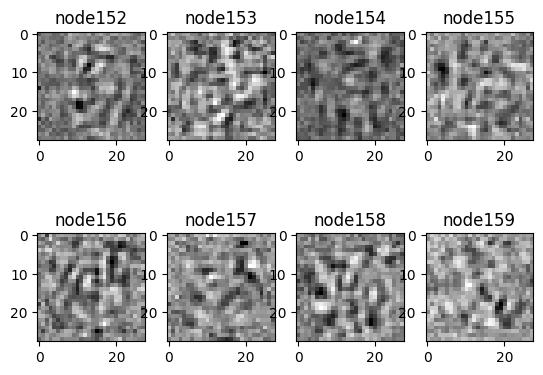

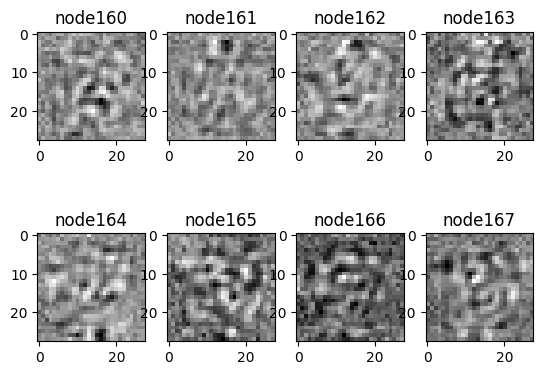

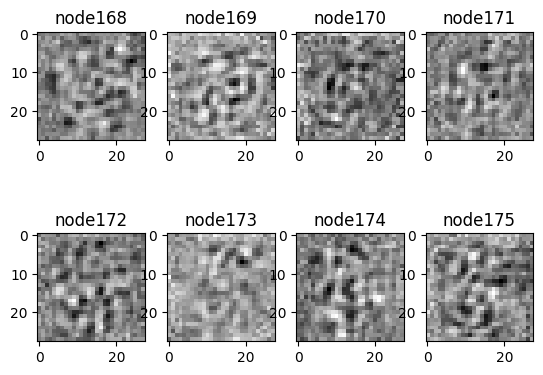

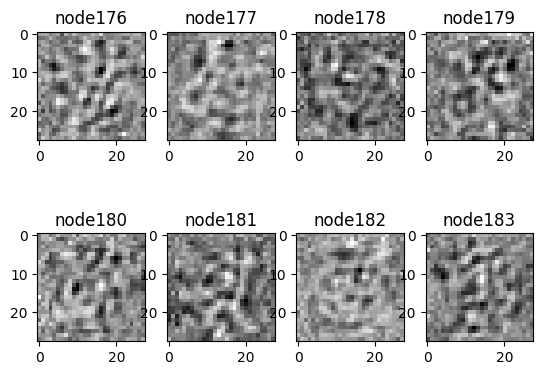

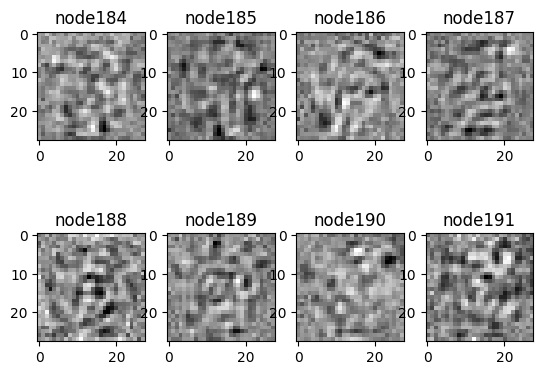

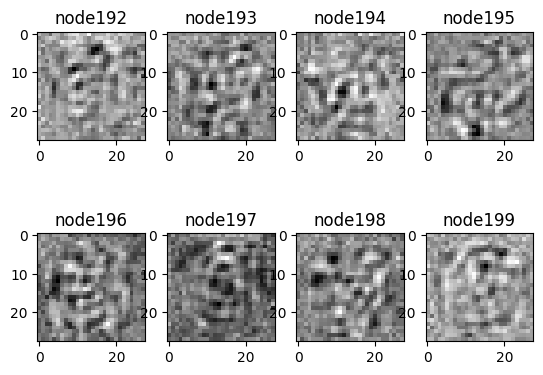

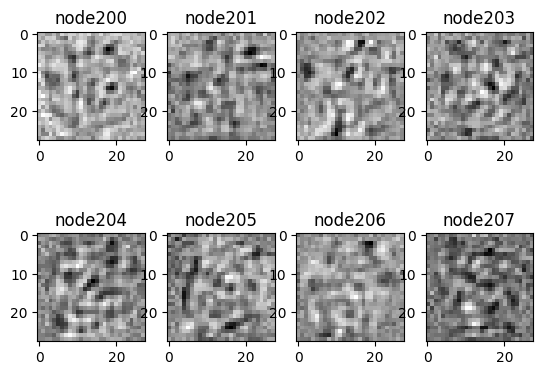

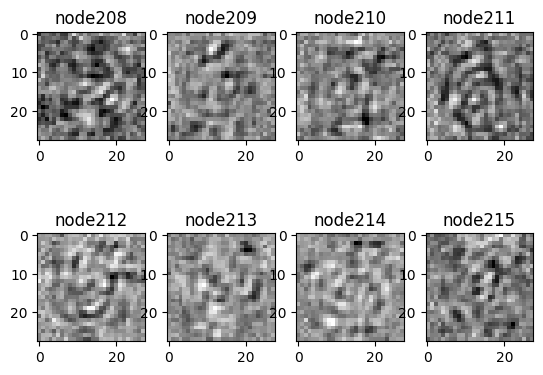

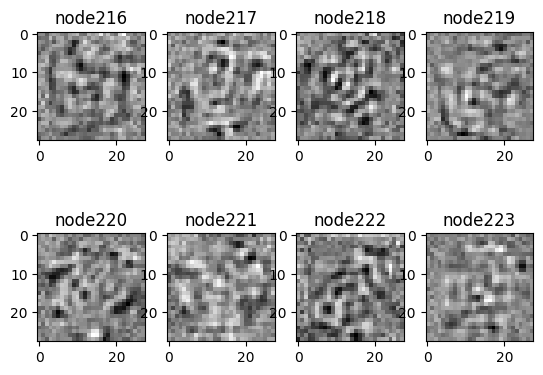

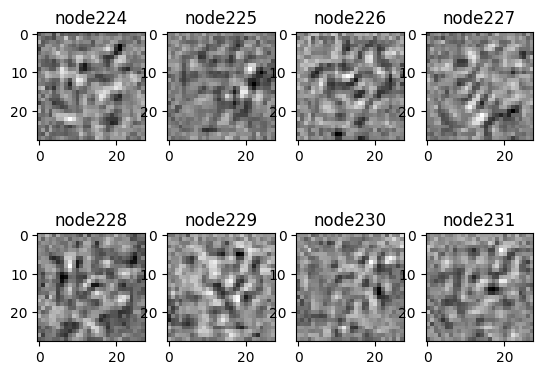

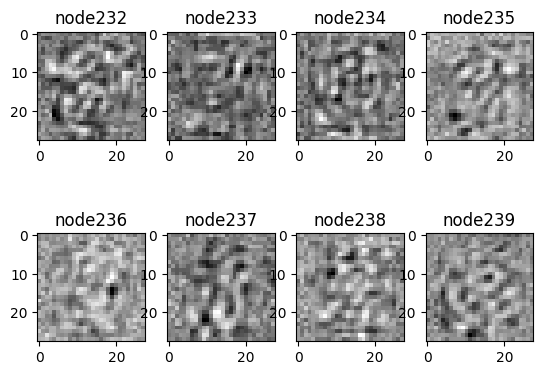

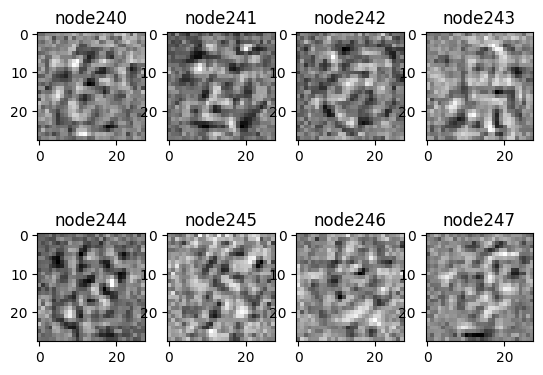

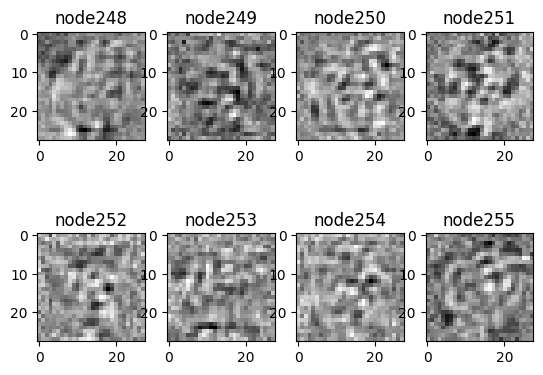

In [32]:
W4=ModelDenoise4.get_weights()[0].T
for i in range(0,W4.shape[0],8):
  plt.subplot(2,4,1)
  plt.title("node{}".format(i))
  plt.imshow(W4[i,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,2)
  plt.title("node{}".format(i+1))
  plt.imshow(W4[i+1,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,3)
  plt.title("node{}".format(i+2))
  plt.imshow(W4[i+2,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,4)
  plt.title("node{}".format(i+3))
  plt.imshow(W4[i+3,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,5)
  plt.title("node{}".format(i+4))
  plt.imshow(W4[i+4,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,6)
  plt.title("node{}".format(i+5))
  plt.imshow(W4[i+5,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,7)
  plt.title("node{}".format(i+6))
  plt.imshow(W4[i+6,:].reshape((28,28)),cmap="gray")
  plt.subplot(2,4,8)
  plt.title("node{}".format(i+7))
  plt.imshow(W4[i+7,:].reshape((28,28)),cmap="gray")
  plt.show()
  

In [34]:
TrErr4=reconstrutErr(Trpred4,TrDataF)
ValErr4=reconstrutErr(Valpred4,ValDataF)
TestErr4=reconstrutErr(Testpred4,TestDataF)

In [35]:
print("Reconstruction Error for Training:",TrErr4)
print("Reconstruction Error for Validation:",ValErr4)
print("Reconstruction Error for Test:",TestErr4)

Reconstruction Error for Training: 5778451.877382521
Reconstruction Error for Validation: 5822196.869565218
Reconstruction Error for Test: 5802451.883003953


In [36]:
#input=Input(shape=(28,28),name="InputLayer")
#l=Flatten()(input)
h24=Dense(100,activation="sigmoid",name="HiddenLayer2")(h14)
h34=Dense(200, activation='sigmoid', name="layer3")(h24)
h44=Dense(100, activation='sigmoid', name="layer4")(h34)
outputc4=Dense(5, activation='softmax')(h44)
ModelDenoise2Class2=keras.Model(inputs=input4,outputs=outputc4,name="DenoisingClassifier")

In [37]:
Adam1=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]
ModelDenoise2Class2.compile(optimizer=Adam1,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [38]:
history_denoise2_class2 = ModelDenoise2Class2.fit(x=DenoiseTr2/255.0,y=TrLabel,batch_size=50,epochs=1000,validation_split=0,validation_data=(DenoiseVal2/255.0,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/1000
228/228 [==============================] - 15s 30ms/step - loss: 0.7581 - accuracy: 0.7550 - val_loss: 0.1577 - val_accuracy: 0.9581
Epoch 2/1000
228/228 [==============================] - 6s 26ms/step - loss: 0.1113 - accuracy: 0.9701 - val_loss: 0.0989 - val_accuracy: 0.9689
Epoch 3/1000
228/228 [==============================] - 7s 30ms/step - loss: 0.0766 - accuracy: 0.9774 - val_loss: 0.0826 - val_accuracy: 0.9747
Epoch 4/1000
228/228 [==============================] - 7s 33ms/step - loss: 0.0602 - accuracy: 0.9831 - val_loss: 0.1041 - val_accuracy: 0.9684
Epoch 5/1000
228/228 [==============================] - 7s 29ms/step - loss: 0.0461 - accuracy: 0.9859 - val_loss: 0.0816 - val_accuracy: 0.9755
Epoch 6/1000
228/228 [==============================] - 7s 29ms/step - loss: 0.0382 - accuracy: 0.9899 - val_loss: 0.0829 - val_accuracy: 0.9723
Epoch 7/1000
228/228 [==============================] - 7s 29ms/step - loss: 0.0286 - accuracy: 0.9920 - val_loss: 0.0853 - val_a